# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [ ]:
import numpy as np

arr = np.random.uniform(0, 20, size=(4, 7))
arr = (arr - arr.min()) / (arr.max() - arr.min())
arr

array([[0.51770322, 0.59517852, 0.03142916, 0.71164866, 0.15739069,
        0.42877346, 0.31499581],
       [0.68396385, 0.88594633, 0.49935678, 0.75752933, 0.08336129,
        0.        , 0.91909854],
       [0.23797299, 0.00171018, 0.70558804, 0.28145524, 0.37750708,
        1.        , 0.54257556],
       [0.98445591, 0.40526518, 0.21530326, 0.72282998, 0.73688226,
        0.89096855, 0.44215397]])

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
arr = np.random.randint(low=0, high=10, size=(8, 10))
sum_by_row = arr.sum(axis=1)
min_idx = np.argmin(sum_by_row)

min_idx, arr[min_idx]

(7, array([0, 6, 1, 5, 3, 3, 4, 9, 0, 1]))

3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 4, 3])

np.sqrt(np.power(x - y, 2).sum())

2.0

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [ ]:
# X = A^-1 * (-C) * B^-1
A = np.array([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]) 
B = np.array([[3, -1], [2, 1]])
C = np.array([[7, 21], [11, 8], [8, 4]])

X = np.linalg.inv(A) @ (-C) @ np.linalg.inv(B)
X


array([[ 1.00000000e+00,  1.11022302e-15],
       [-2.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00, -4.00000000e+00]])

In [ ]:
A @ X @ B, -C

(array([[ -7., -21.],
        [-11.,  -8.],
        [ -8.,  -4.]]),
 array([[ -7, -21],
        [-11,  -8],
        [ -8,  -4]]))

## Лабораторная работа №1

__При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.__

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [ ]:
import numpy as np

In [ ]:
data = np.loadtxt(fname='minutes_n_ingredients.csv', dtype='int32', delimiter=',', skiprows=1)
data[0:5]

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       [ 67660,      5,      6],
       [157911,     60,     14]])

2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [ ]:

np.mean(data, axis=0)[1:], np.min(data, axis=0)[1:], np.max(data, axis=0)[1:], np.median(data, axis=0)[1:]

(array([2.16010017e+04, 9.05528000e+00]),
 array([0, 1]),
 array([2147483647,         39]),
 array([40.,  9.]))

3. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [ ]:
data[np.random.randint(low=0, high=data.shape[0], size=10), 2]

array([ 6,  8,  8,  7,  4,  7, 11,  4,  9,  6])

4. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [ ]:
data[data[:, 2] <= 5]

array([[446597,     15,      5],
       [204134,      5,      3],
       [ 25623,      6,      4],
       ...,
       [ 52088,     60,      5],
       [128811,     15,      4],
       [370915,      5,      4]])

5. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [ ]:
data[data[:, 2] < np.mean(data[:, 2])].shape[0] / data.shape[0]

0.58802

6. Вычислите значение $q_{0.75}$ третьего квартиля продолжительности выполнения рецепта. Замените в этом столбце значения, большие чем $q_{0.75}$ на величину $q_{0.75}$.

In [ ]:
q_3 = np.quantile(data[:, 1], 0.75)
q_3

65.0

In [ ]:
data[data[:, 1] > q_3, 1] = q_3 # !!! индексация внутри 
data[:, 1]

array([60, 25, 10, ..., 65,  5, 65])

In [ ]:
#data[:, 1] = np.clip(data[:, 1], a_min=None, a_max=q_3)
#data[:, 1]

7. Посчитайте, для скольких рецептов исходного массива указана продолжительность, равная нулю. Модифицируйте исходный массив, заменив для таких строк значение в данном столбце на 1.

In [ ]:
len(data[data[:, 1] == 0])

0

In [ ]:
data[data[:, 1] == 0] = 1

In [ ]:
len(data[data[:, 1] == 0])

0

8. Найдите множество возможных значений величины количества ингредиентов и количество вхождений каждого из уникальных значений в набор данных. Используя `numpy.isin`, выясните, какие числа из отрезка [1, 41] отсуствуют в данном множестве и выведите их на экран. 

In [ ]:
uniq = np.unique(data[:, 2], return_counts=True)
uniq

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 37, 39]),
 array([  492,   924,  2884,  5479,  7874,  9328, 10579, 10887, 10542,
         9548,  8262,  6574,  4985,  3639,  2583,  1760,  1237,   787,
          566,   376,   214,   161,   105,    68,    50,    28,    16,
           16,    12,    12,     3,     1,     2,     1,     3,     1,
            1], dtype=int64))

In [ ]:
range_1_41 = np.arange(1, 42)
range_1_41[np.isin(range_1_41, uniq[0], invert=True)]

array([36, 38, 40, 41])

9. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета.

In [ ]:
ing_per_min = data[:, 2] / data[:, 1]

In [ ]:
np.max(ing_per_min)

23.0

10. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [ ]:
ind_top_100 = np.argsort(data[:, 1])
np.mean(np.take_along_axis(data[:, 2], ind_top_100, axis=0)[-101:-1])

9.9

11. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае. Выведите процент "простых" рецептов в датасете.

In [ ]:
data = np.column_stack([data, np.logical_and(data[:, 1] <= 20, data[:, 2] <= 5).astype(int)])
data

array([[127244,     60,     16,      0],
       [ 23891,     25,      7,      0],
       [ 94746,     10,      6,      0],
       ...,
       [498432,     65,     15,      0],
       [370915,      5,      4,      1],
       [ 81993,     65,     14,      0]])

In [ ]:
# дело в [], только чеерз них можно добавить через concatenate, stack и т.д.
# т.к. тогда траспонирование нормально работает, так как изначально одномерный массив 
np.append(data, np.array([np.logical_and(data[:, 1] <= 20, data[:, 2] <= 5).astype(int)]).T, axis=1)


array([[127244,     60,     16,      0,      0],
       [ 23891,     25,      7,      0,      0],
       [ 94746,     10,      6,      0,      0],
       ...,
       [498432,     65,     15,      0,      0],
       [370915,      5,      4,      1,      1],
       [ 81993,     65,     14,      0,      0]])

In [ ]:
print(data.shape, np.array(np.logical_and(data[:, 1] <= 20, data[:, 2] <= 5).astype(int)).T.shape,
     np.array([np.logical_and(data[:, 1] <= 20, data[:, 2] <= 5).astype(int)]).T.shape,
     np.array([np.logical_and(data[:, 1] <= 20, data[:, 2] <= 5).astype(int)]).shape)

(100000, 4) (100000,) (100000, 1) (1, 100000)


In [ ]:
data[:, 3].sum(axis=0) / data.shape[0]

0.09943

12. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет не менее 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.

13. Пусть в среднем одна минута работы повара стоит ресторану 5 ед., а средняя стоимость одного ингредиента составляет 10 ед. 
Создайте вектор-столбец `numpy`, содержащий данную информацию. Посчитайте среднюю стоимость приготовления для каждого из первых 10 рецептов в наборе данных.

In [ ]:
data_row_shape = data.shape[0]
arr_price = np.array([[5] * data_row_shape, [10] * data_row_shape])

data = np.column_stack([data, arr_price[0], arr_price[1]])

In [ ]:
arr_price

array([[ 5,  5,  5, ...,  5,  5,  5],
       [10, 10, 10, ..., 10, 10, 10]])

In [ ]:
data

array([[127244,     60,     16,      5,     10],
       [ 23891,     25,      7,      5,     10],
       [ 94746,     10,      6,      5,     10],
       ...,
       [498432,     65,     15,      5,     10],
       [370915,      5,      4,      5,     10],
       [ 81993,    140,     14,      5,     10]])

In [ ]:
data[:10, 1] * data[:10, -2] + data[:10, 2] * data[:10, -1]

array([460, 195, 110,  85, 440, 270, 180, 125, 125, 170])

In [ ]:
data[:10, 1:3] @ [[5], [10]]

array([[460],
       [195],
       [110],
       [ 85],
       [440],
       [270],
       [180],
       [125],
       [125],
       [170]])

# Pandas (2)

Материалы:
* Макрушин С.В. "Лекция 2: Библиотека Pandas"
* https://pandas.pydata.org/docs/user_guide/index.html#
* https://pandas.pydata.org/docs/reference/index.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Загрузите данные из файла `sp500hst.txt` и обозначьте столбцы в соответствии с содержимым: `"date", "ticker", "open", "high", "low", "close", "volume"`.

2. Посчитайте количество уникальных цифр, которые используются каждой строке в столбце volume.

3. Для каждой строки рассчитайте разность между значениями high и low, если индекс столбца нечетный, и разность между close и high в противном случае.

4. Рассчитайте суммарный объем торгов для для одинаковых значений тикеров.

5. Загрузите данные из файла sp500hst.txt и обозначьте столбцы в соответствии с содержимым: "date", "ticker", "open", "high", "low", "close", "volume". Добавьте столбец с расшифровкой названия тикера, используя данные из файла `sp_data2.csv` . В случае нехватки данных об именах тикеров корректно обработать их.

## Лабораторная работа №2.2

In [ ]:
import pandas as pd

__Данная работа является продолжением ЛР №2. Для начала работы загрузите таблицы (см. задание 1.1)__

In [ ]:
recipes = pd.read_csv('02_pandas_data/recipes_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['submitted']
                )

reviews = pd.read_csv('02_pandas_data/reviews_sample.csv', 
                 sep=',', 
                 header=0,
                 index_col=0
                )

### Применение функций к pd.Series и pd.DataFrame

4.1 Напишите функцию, которая переводит минуты в формат "XhYm". Примените эту функцию к столбцу `minutes` таблицы `recipes` (без перезаписи исходного столбца) при помощи метода `map`.

In [ ]:
recipes.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN


In [ ]:
def m_to_hm(m: int) -> str:
    return f"{m // 60}h{m % 60}m"


assert m_to_hm(90) == "1h30m"
assert m_to_hm(10) == "0h10m"

In [ ]:
recipes.minutes.map(m_to_hm)  

0        1h30m
1        0h10m
2        0h30m
3        0h45m
4        0h25m
         ...  
29995    1h20m
29996     4h0m
29997    1h15m
29998     1h0m
29999    0h29m
Name: minutes, Length: 30000, dtype: object

4.2 На основе таблицы `recipes` создайте таблицу, которая содержит только текстовые столбцы (используйте метод `select_dtypes`).  Примените к каждому элементу этой таблицы строковый метод `str.capitalize` при помощи метода `applymap`, не удаляя пропуски.

In [ ]:
recipes.select_dtypes(include=object).applymap(str.capitalize, na_action='ignore')

,name,description
0,George s at the cove black bean soup,An original recipe created by chef scott meska...
1,Healthy for them yogurt popsicles,My children and their friends ask for my homem...
2,I can t believe it s spinach,"These were so go, it surprised even me."
3,Italian gut busters,My sister-in-law made these for us at a family...
4,Love is in the air beef fondue sauces,I think a fondue is a very romantic casual din...
...,...,...
29995,Zurie s holey rustic olive and cheddar bread,This is based on a french recipe but i changed...
29996,Zwetschgenkuchen bavarian plum cake,"This is a traditional fresh plum cake, thought..."
29997,Zwiebelkuchen southwest german onion cake,This is a traditional late summer early fall s...
29998,Zydeco soup,This is a delicious soup that i originally fou...


4.3 Напишите функцию, которая принимает на вход серию `pd.Series` и для серий, содержащих текстовые данные, возвращает максимальную длину строк в ней, а для числовых серий возвращает минимальный элемент в этой серии. Примените данную функцию к каждому столбцу таблицы `recipes` при помощи метода `apply`.

In [ ]:
def get_stats(x: pd.Series) -> int:
    dtype = x.dtype
    
    if dtype == 'object':
        return x.str.len().max()
    
    #в документации проверил, что нумерик в пандас имеет только 2 типа
    if dtype == 'int64' or dtype == 'float64':
        return x.min()


assert get_stats(pd.Series(['a', 'bbbb', 'ccc'])) == 4
assert get_stats(pd.Series([1, 3, 2])) == 1

### Группировки таблиц `pd.DataFrame`

5.1 Посчитайте количество рецептов, представленных каждым из участников (`contributor_id`). Какой участник добавил максимальное кол-во рецептов?

In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            30000 non-null  object        
 1   id              30000 non-null  int64         
 2   minutes         30000 non-null  int64         
 3   contributor_id  30000 non-null  int64         
 4   submitted       30000 non-null  datetime64[ns]
 5   n_steps         18810 non-null  float64       
 6   description     29377 non-null  object        
 7   n_ingredients   21120 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.8+ MB


In [ ]:
sample = (recipes[['contributor_id', 'id']]
          .groupby('contributor_id')
          .count()
          .rename(columns={'id': 'rew_count'})
         )

sample.head(5)

,rew_count
contributor_id,
1530,5
1533,186
1534,50
1535,40
1538,8


In [ ]:
sample.sort_values(by='rew_count').tail(1)

,rew_count
contributor_id,
89831,421


In [ ]:
sample[sample.rew_count == sample.rew_count.max()]

,rew_count
contributor_id,
89831,421


In [ ]:
sample.loc[sample.idxmax()]

,rew_count
contributor_id,
89831,421


5.2 Посчитайте средний рейтинг к каждому из рецептов. Для скольких рецептов отсутствуют отзывы? Обратите внимание, что отзыв с нулевым рейтингом или не заполненным текстовым описанием не считается отсутствующим.

In [ ]:
reviews.head(3)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."


In [ ]:
#неправильно!!
reviews.isna().sum()

user_id       0
recipe_id     0
date          0
rating        0
review       17
dtype: int64

In [ ]:
#!!!правильное
recipes[~recipes.id.isin(reviews.recipe_id)].shape

In [ ]:
reviews[['recipe_id', 'rating']].groupby('recipe_id').mean().rename(columns={'rating': 'mean_rating'}).head(3)

,mean_rating
recipe_id,
48,1.000000
55,4.750000
66,4.944444


5.3 Посчитайте количество рецептов с разбивкой по годам создания.

In [ ]:
recipes.isna().sum()

name                  0
id                    0
minutes               0
contributor_id        0
submitted             0
n_steps           11190
description         623
n_ingredients      8880
dtype: int64

In [ ]:
recipes['year'] = recipes.submitted.dt.year
recipes[['id', 'year']].groupby('year').count().rename(columns={'id': 'count'}).head(3)

,count
year,
1999,275
2000,104
2001,589


5.4 Напишите функцию, которая принимает на вход таблицу (аналогичную `recipes` по набору столбцов), и возвращает `True` в том случае, если в столбце `minutes` присутствуют только значения, меньшие либо равные 10. Сгруппируйте таблицу `recipes` по полю `contributor_id` и для каждого участника выясните, справедливо ли, что все его рецепты занимают не более 10 минут.

In [ ]:
import numpy as np


def has_only_fast_recipes(x: pd.DataFrame) -> bool:
    #или x.minutes.max() <= 10
    return (x.minutes <= 10).all()

assert not has_only_fast_recipes(
    pd.DataFrame(
        {
            "name": {0: "george s", 1: "healthy"},
            "id": {0: 44123, 1: 67664},
            "minutes": {0: 90, 1: 10},
            "contributor_id": {0: 35193, 1: 91970},
            "submitted": {0: "2002-10-25", 1: "2003-07-26"},
            "n_steps": {0: np.nan, 1: np.nan},
            "description": {0: "123", 1: "zxc"},
            "n_ingredients": {0: 18.0, 1: np.nan},
        }
    )
)
assert has_only_fast_recipes(
    pd.DataFrame(
        {
            "name": {0: "george s", 1: "healthy"},
            "id": {0: 44123, 1: 67664},
            "minutes": {0: 7, 1: 5},
            "contributor_id": {0: 35193, 1: 91970},
            "submitted": {0: "2002-10-25", 1: "2003-07-26"},
            "n_steps": {0: np.nan, 1: np.nan},
            "description": {0: "123", 1: "zxc"},
            "n_ingredients": {0: 18.0, 1: np.nan},
        }
    )
)

In [ ]:
result = recipes[['contributor_id', 'minutes']].groupby('contributor_id').apply(has_only_fast_recipes)

result.head(3)

contributor_id
1530    False
1533    False
1534    False
dtype: bool

In [ ]:
recipes[['contributor_id', 'minutes']].groupby('contributor_id').filter(has_only_fast_recipes).head(3)

,contributor_id,minutes
1,91970,10
44,1010057,6
46,797706,5


In [ ]:
result.value_counts()

False    7767
True      637
dtype: int64

### Объединение таблиц `pd.DataFrame`

6.1 При помощи объединения таблиц, создайте `DataFrame`, состоящий из четырех столбцов: `id`, `name`, `user_id`, `rating`. Рецепты, на которые не оставлен ни один отзыв, должны отсутствовать в полученной таблице. Подтвердите правильность работы вашего кода, выбрав рецепт, не имеющий отзывов, и попытавшись найти строку, соответствующую этому рецепту, в полученном `DataFrame`.

In [ ]:
summary_table = pd.merge(
                    recipes[['id', 'name']], 
                    reviews[['user_id', 'rating', 'recipe_id']],
                    how='right',
                    left_on='id',
                    right_on='recipe_id',
                    copy=True
                ).drop('recipe_id', axis=1)

summary_table.head(2)

,id,name,user_id,rating
0,57993,salmon with tomatoes,21752,5
1,142201,lemon cajun stir fry,431813,5


In [ ]:
summary_table.isna().sum()

id         0
name       0
user_id    0
rating     0
dtype: int64

In [ ]:
recipes[recipes.id == 223349]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,year
26,pasta with shrimp eggplant,223349,50,452592,2007-04-18,7.0,a nice low carb way to feel like you are eatin...,9.0,2007


In [ ]:
reviews[reviews.recipe_id == 223349]

,user_id,recipe_id,date,rating,review


In [ ]:
summary_table[summary_table.id == 223349]

,id,name,user_id,rating


6.2 При помощи объединения таблиц и группировок, создайте `DataFrame`, состоящий из трех столбцов: `recipe_id`, `name`, `review_count`, где столбец `review_count` содержит кол-во отзывов, оставленных на рецепт `recipe_id`. У рецептов, на которые не оставлен ни один отзыв, в столбце `review_count` должен быть указан 0. Подтвердите правильность работы вашего кода, выбрав рецепт, не имеющий отзывов, и найдя строку, соответствующую этому рецепту, в полученном `DataFrame`.

In [ ]:
df_result = pd.merge(
                recipes[['id', 'name']].rename(columns={'id': 'recipe_id'}), 
                reviews[['rating', 'recipe_id']].groupby('recipe_id').count().rename(columns={'rating': 'review_count'}),
                how='left',
                on='recipe_id',
                copy=True
            )

df_result

,recipe_id,name,review_count
0,44123,george s at the cove black bean soup,3.0
1,67664,healthy for them yogurt popsicles,8.0
2,38798,i can t believe it s spinach,3.0
3,35173,italian gut busters,1.0
4,84797,love is in the air beef fondue sauces,8.0
...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,4.0
29996,386977,zwetschgenkuchen bavarian plum cake,2.0
29997,103312,zwiebelkuchen southwest german onion cake,6.0
29998,486161,zydeco soup,6.0


Проверка:

In [ ]:
df_result[df_result.recipe_id == 223349]

,recipe_id,name,review_count
26,223349,pasta with shrimp eggplant,NaN


In [ ]:
recipes[recipes.id == 223349]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,year
26,pasta with shrimp eggplant,223349,50,452592,2007-04-18,7.0,a nice low carb way to feel like you are eatin...,9.0,2007


In [ ]:
reviews[reviews.recipe_id == 223349]

,user_id,recipe_id,date,rating,review


6.3. Выясните, рецепты, добавленные в каком году, имеют наименьший средний рейтинг?

In [ ]:
min_rating = pd.merge(
                    recipes[['id', 'year']].rename(columns={'id': 'recipe_id'}), 
                    reviews[['rating', 'recipe_id']],
                    how='right',
                    on='recipe_id',
                    copy=True
             ).drop('recipe_id', axis=1).groupby('year').mean()
                            
min_rating.loc[min_rating.idxmin()]

,rating
year,
2017,2.75


### Сохранение таблиц `pd.DataFrame`

7.1 Отсортируйте результат выполнения задания 6.1 в порядке убывания величины столбца `id` и сохраните результаты в csv файл. 

In [ ]:
summary_table.sort_values('rating', ascending=False).to_csv('6_1.csv')

7.2 Воспользовавшись `pd.ExcelWriter`, cохраните результаты 6.1 и 6.2 в файл: на лист с названием `Рецепты с оценками` сохраните результаты выполнения 6.1; на лист с названием `Количество отзывов по рецептам` сохраните результаты выполнения 6.2.

In [ ]:
with pd.ExcelWriter("7_2.xlsx") as writer:
    summary_table.to_excel(writer, sheet_name="Рецепты с оценками", index=False)  
    df_result.to_excel(writer, sheet_name="Количество отзывов по рецептам", index=False) 

Лабораторная работа №3

In [ ]:
import json
from bs4 import BeautifulSoup 
import numpy as np 
import h5py
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Материалы:
* Макрушин С.В. "Форматы данных"
* https://docs.python.org/3/library/json.html
* https://docs.h5py.org/en/stable/
* https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Вывести телефоны, содержащиеся в адресной книге `addres-book.json`

In [ ]:
import json

In [ ]:
#file pointer
fp = open(
    '03_data_files_data/addres-book.json',
    'r',
    encoding='utf-8'
)
#do smth...
fp.close()

<_io.TextIOWrapper name='03_data_files_data/addres-book.json' mode='r' encoding='utf-8'>

In [ ]:
with open(
    '03_data_files_data/addres-book.json',
    'r',
    encoding='utf-8'
) as fp:
    #do smth
    book = json.load(fp)

book    

[{'name': 'Faina Lee',
  'email': 'faina@mail.ru',
  'birthday': '22.08.1994',
  'phones': [{'phone': '232-19-55'}, {'phone': '+7 (916) 232-19-55'}]},
 {'name': 'Robert Lee',
  'email': 'robert@mail.ru',
  'birthday': '22.08.1994',
  'phones': [{'phone': '111-19-55'}, {'phone': '+7 (916) 445-19-55'}]}]

In [ ]:
#Вывести телефоны, содержащиеся в адресной книге addres-book.json
phones = []
for person in book:
    phones.extend(ph['phone'] for ph in person['phones'])
phones

['232-19-55', '+7 (916) 232-19-55', '111-19-55', '+7 (916) 445-19-55']

2. По данным из файла `addres-book-q.xml` сформировать список словарей с телефонами каждого из людей. 

In [ ]:
from bs4 import BeautifulSoup 

with open(
    '03_data_files_data/addres-book-q.xml',
    'r',
    encoding='utf-8'
) as fp:
    #do smth
    xml_book = BeautifulSoup(fp)

xml_book

<?xml version="1.0" encoding="UTF-8" ?><html><body><address_book>
<country name="algeria">
<address id="1">
<gender>m</gender>
<name>Aicha Barki</name>
<email>aiqraa.asso@caramail.com</email>
<position>Presidente</position>
<company>Association Algerienne d'Alphabetisation Iqraa</company>
<phones>
<phone type="work">+ (213) 6150 4015</phone>
<phone type="personal">+ (213) 2173 5247</phone>
</phones>
</address>
</country>
<country name="angola">
<address id="2">
<gender>m</gender>
<name>Francisco Domingos</name>
<email>frandomingos@hotmail.com</email>
<position>Directeur General</position>
<company>Institut National de Education des Adultes</company>
<phones>
<phone type="work">+ (244-2) 325 023</phone>
<phone type="personal">+ (244-2) 325 023</phone>
</phones>
</address>
<address id="3">
<gender>f</gender>
<name>Maria Luisa</name>
<email>luisagrilo@ebonet.net</email>
<position>Directrice Nationale</position>
<company>Institut National de Education des Adultes</company>
<phones>
<phone 

In [ ]:
addresses = xml_book.find_all('address')
addresses[0]

<address id="1">
<gender>m</gender>
<name>Aicha Barki</name>
<email>aiqraa.asso@caramail.com</email>
<position>Presidente</position>
<company>Association Algerienne d'Alphabetisation Iqraa</company>
<phones>
<phone type="work">+ (213) 6150 4015</phone>
<phone type="personal">+ (213) 2173 5247</phone>
</phones>
</address>

In [ ]:
phones = addresses[0].find_all('phone')

phones[0]

<phone type="work">+ (213) 6150 4015</phone>

In [ ]:
phones[0].text, phones[0]['type']

('+ (213) 6150 4015', 'work')

In [ ]:
phones[0].attrs

{'type': 'work'}

In [ ]:
#соберём все рабочие телефоны:
phones = []
for address in addresses:
    phones.extend(ph.text for ph in address.find_all('phone')
                 if ph['type'] == 'work')
    
phones

['+ (213) 6150 4015',
 '+ (244-2) 325 023',
 '+ (244-2) 325 023',
 '+ (54-11) 4784 1159',
 '+ (61-2) 6274 9500',
 '+ (61-3) 9807 4702']

3. Создайте 2 матрицы размера 1000x1000, используя различные параметризируемые распределения из numpy (https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html#distributions)

После этого сохраните получившиеся матрицы в hdf5-файл в виде двух различных датасетов. В качестве описания каждого датасета укажите параметры используемых распределений 

In [ ]:
#формат в основном для работы с числами 
import numpy as np 
import h5py

m1 = np.random.exponential(scale=2, size=(1000, 1000))
m2 = np.random.exponential(scale=20, size=(1000, 1000))

with h5py.File(
    'test.h5',
    'w'
) as hdf:
    gr = hdf.create_group('group1')
    #exp1 добавили в группу 1
    exp1 = gr.create_dataset('exp1', data=m1)
    exp1.attrs['description'] = 'Sample from exp. w scale 2'
    #exp2 уйдёт в корень файла
    exp2 = hdf.create_dataset('exp2', data=m2)
    exp2.attrs['description'] = 'Sample from exp. w scale 20'    

In [ ]:
with h5py.File(
    'test.h5',
    'r'
) as hdf:
    #если в группе можно считать как hdf['group1/exp1'] или gr = hdf['group1'], gr['exp1']
    print(hdf.keys())
    exp1 = hdf['exp1']
    print(exp1)
    data = exp1[:100, :100]

<KeysViewHDF5 ['exp1', 'exp2']>
<HDF5 dataset "exp1": shape (1000, 1000), type "<f8">


In [ ]:
#теперь это уже закрытый датасет
print(exp1[101, 101])

ValueError: Not a dataset (not a dataset)

In [ ]:
data

array([[1.28115177e+00, 1.70340964e+00, 1.04151403e+00, ...,
        3.14481945e+00, 3.65941285e-01, 1.00961450e+00],
       [3.68605423e+00, 9.06754081e-02, 3.50940403e-02, ...,
        2.07997237e+00, 1.79923070e+01, 3.47691487e+00],
       [1.53808286e-03, 1.31757295e+00, 2.75129181e-01, ...,
        1.05770333e+00, 3.43620951e+00, 4.79247369e+00],
       ...,
       [6.16923406e+00, 3.17529985e+00, 7.26541784e+00, ...,
        1.01932685e+00, 1.74959393e+00, 9.15198806e-03],
       [9.99059487e-01, 2.23906549e+00, 6.44733747e+00, ...,
        1.03360632e+00, 7.26054844e-01, 2.13690742e+00],
       [7.22444801e-01, 7.82849963e-02, 1.34706106e-01, ...,
        5.70165350e+00, 2.84726998e+00, 6.82159410e-01]])

Лабораторная работа №3

### JSON

1.1 Считайте файл `contributors_sample.json`, воспользовавшись модулем `json` и свяжите загруженные данные с переменной `contributors`. Выведите на экран уникальные почтовые домены, содержащиеся в почтовых адресах людей. Под доменом понимается часть адреса, следующая за символом `@`.

In [ ]:
with open(
    '03_data_files_data/contributors_sample.json',
    'r',
    encoding='utf-8'
) as fp:
    #do smth
    contributors = json.load(fp)
contributors

[{'username': 'uhebert',
  'name': 'Lindsey Nguyen',
  'sex': 'F',
  'address': '01261 Cameron Spring\nTaylorfurt, AK 97791',
  'mail': 'jsalazar@gmail.com',
  'jobs': ['Energy engineer',
   'Engineer, site',
   'Environmental health practitioner',
   'Biomedical scientist',
   'Jewellery designer'],
  'id': 35193},
 {'username': 'vickitaylor',
  'name': 'Cheryl Lewis',
  'sex': 'F',
  'address': '66992 Welch Brooks\nMarshallshire, ID 56004',
  'mail': 'bhudson@gmail.com',
  'jobs': ['Music therapist',
   'Volunteer coordinator',
   'Designer, interior/spatial'],
  'id': 91970},
 {'username': 'sheilaadams',
  'name': 'Julia Allen',
  'sex': 'F',
  'address': 'Unit 1632 Box 2971\nDPO AE 23297',
  'mail': 'darren44@yahoo.com',
  'jobs': ['Management consultant',
   'Engineer, structural',
   'Lecturer, higher education',
   'Theatre manager',
   'Designer, textile'],
  'id': 1848091},
 {'username': 'nicole82',
  'name': 'Gina Stevens',
  'sex': 'F',
  'address': '9880 Michelle Bridge\nNe

In [ ]:
domens = set()

for user in contributors:
    domens.add(user['mail'].split('@')[1])

print(*domens, sep='\n')

gmail.com
yahoo.com
hotmail.com


1.2 Посчитайте, как часто встречается та или иная должность во всем наборе данных. Выведите на экран 5 должностей, которые встречаются наиболее часто. Для каждого пользователя из `contributors` выясните, какая из его должностей является наиболее распространенной (в смысле частоты упоминания во всем датасете) и добавьте ключ `top_job`, в котором хранится название этой должности.

In [ ]:
jobs_count = dict()

for user in contributors:
    for job in user['jobs']:
        if job in jobs_count.keys():
            jobs_count[job] += 1
        else:
            jobs_count[job] = 1

jobs_count

{'Energy engineer': 22,
 'Engineer, site': 27,
 'Environmental health practitioner': 29,
 'Biomedical scientist': 23,
 'Jewellery designer': 23,
 'Music therapist': 28,
 'Volunteer coordinator': 18,
 'Designer, interior/spatial': 24,
 'Management consultant': 33,
 'Engineer, structural': 26,
 'Lecturer, higher education': 27,
 'Theatre manager': 24,
 'Designer, textile': 20,
 'Mechanical engineer': 32,
 'Retail banker': 34,
 'Barrister': 35,
 'Network engineer': 27,
 'Youth worker': 33,
 'Primary school teacher': 22,
 'Engineer, broadcasting (operations)': 26,
 'Designer, ceramics/pottery': 30,
 'Engineer, energy': 22,
 'Engineer, manufacturing': 27,
 'Designer, furniture': 26,
 'Sport and exercise psychologist': 23,
 'Hospital pharmacist': 22,
 'Surveyor, minerals': 30,
 'Geochemist': 30,
 'Restaurant manager': 30,
 'Clinical psychologist': 25,
 'Sports development officer': 27,
 'Firefighter': 36,
 'Charity fundraiser': 26,
 'Insurance underwriter': 25,
 'Analytical chemist': 27,
 'H

In [ ]:
from collections import Counter


jobs = Counter(job for user in contributors for job in user['jobs'])

jobs #можно накинуть dict, но смысла нет

Counter({'Energy engineer': 22,
         'Engineer, site': 27,
         'Environmental health practitioner': 29,
         'Biomedical scientist': 23,
         'Jewellery designer': 23,
         'Music therapist': 28,
         'Volunteer coordinator': 18,
         'Designer, interior/spatial': 24,
         'Management consultant': 33,
         'Engineer, structural': 26,
         'Lecturer, higher education': 27,
         'Theatre manager': 24,
         'Designer, textile': 20,
         'Mechanical engineer': 32,
         'Retail banker': 34,
         'Barrister': 35,
         'Network engineer': 27,
         'Youth worker': 33,
         'Primary school teacher': 22,
         'Engineer, broadcasting (operations)': 26,
         'Designer, ceramics/pottery': 30,
         'Engineer, energy': 22,
         'Engineer, manufacturing': 27,
         'Designer, furniture': 26,
         'Sport and exercise psychologist': 23,
         'Hospital pharmacist': 22,
         'Surveyor, minerals': 30,
  

In [ ]:
#для понимания операций двух циклов
for user in contributors[0:2]:
    for job in user['jobs']:
        print(job)

Energy engineer
Engineer, site
Environmental health practitioner
Biomedical scientist
Jewellery designer
Music therapist
Volunteer coordinator
Designer, interior/spatial


In [ ]:
print(*[job[0] for job in sorted(jobs.items(), key=lambda val: val[1], reverse=True)[:5]], sep='\n')

Chemical engineer
Chief Operating Officer
Dance movement psychotherapist
Bookseller
Telecommunications researcher


In [ ]:
for user in contributors:
    user['top_job'] = max(user['jobs'], key = lambda i: jobs[i]) 

contributors 

[{'username': 'uhebert',
  'name': 'Lindsey Nguyen',
  'sex': 'F',
  'address': '01261 Cameron Spring\nTaylorfurt, AK 97791',
  'mail': 'jsalazar@gmail.com',
  'jobs': ['Energy engineer',
   'Engineer, site',
   'Environmental health practitioner',
   'Biomedical scientist',
   'Jewellery designer'],
  'id': 35193,
  'top_job': 'Environmental health practitioner'},
 {'username': 'vickitaylor',
  'name': 'Cheryl Lewis',
  'sex': 'F',
  'address': '66992 Welch Brooks\nMarshallshire, ID 56004',
  'mail': 'bhudson@gmail.com',
  'jobs': ['Music therapist',
   'Volunteer coordinator',
   'Designer, interior/spatial'],
  'id': 91970,
  'top_job': 'Music therapist'},
 {'username': 'sheilaadams',
  'name': 'Julia Allen',
  'sex': 'F',
  'address': 'Unit 1632 Box 2971\nDPO AE 23297',
  'mail': 'darren44@yahoo.com',
  'jobs': ['Management consultant',
   'Engineer, structural',
   'Lecturer, higher education',
   'Theatre manager',
   'Designer, textile'],
  'id': 1848091,
  'top_job': 'Managemen

1.3 Создайте `pd.DataFrame` `contributors_df`, имеющий столбцы `id`, `username` и `sex` и `n_jobs`. Столбец `n_jobs` содержит кол-во должностей пользователя. При необходимости вы можете преобразовать исходные данные в списке `contributors` в удобный для создания `pd.DataFrame` вид.

Сгруппируйте полученные данные по столбцам `n_jobs` и `sex`. Выведите на экран серию `pd.Series`, в которой содержится информация о количестве человек в каждой группе.

In [ ]:
#можно взять со считанного дикта
pd.DataFrame.from_dict(contributors).head(2)

,username,name,sex,address,mail,jobs,id,top_job
0,uhebert,Lindsey Nguyen,F,"01261 Cameron Spring\nTaylorfurt, AK 97791",jsalazar@gmail.com,"[Energy engineer, Engineer, site, Environmenta...",35193,Environmental health practitioner
1,vickitaylor,Cheryl Lewis,F,"66992 Welch Brooks\nMarshallshire, ID 56004",bhudson@gmail.com,"[Music therapist, Volunteer coordinator, Desig...",91970,Music therapist


In [ ]:
#можно считать с json
contributors_df = (pd.read_json('03_data_files_data/contributors_sample.json')
                   .drop(['name', 'address', 'mail'], axis=1)
                   .reindex(columns=('id', 'username', 'sex',  'jobs'))
                   .rename(columns={'jobs': 'n_jobs'})
                  )

contributors_df.n_jobs = contributors_df.n_jobs.apply(lambda x: len(x))

contributors_df.head(2)

,id,username,sex,n_jobs
0,35193,uhebert,F,5
1,91970,vickitaylor,F,3


In [ ]:
contributors_df.groupby(['n_jobs', 'sex']).count().drop('username', axis=1).rename(columns={'id': 'count'})

count
n_jobs sex       
3      F      703
       M      690
4      F      733
       M      704
5      F      700
       M      670

### XML

2.1 По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту вида `{id_рецепта: ["шаг1", "шаг2"]}`. Сохраните этот словарь в файл `steps_sample.json`. Выведите на экран шаги рецепта с id `84797`.

In [ ]:
with open(
    '03_data_files_data/steps_sample.xml',
    'r',
    encoding='utf-8'
) as fp:
    #do smth
    steps_sample = BeautifulSoup(fp)

steps_sample

In [ ]:
steps_sample.find_all('recipe')[0].find_all('step')

[<step has_minutes="1">in 1 / 4 cup butter , saute carrots , onion , celery and broccoli stems for 5 minutes</step>,
 <step>add thyme , oregano and basil</step>,
 <step has_minutes="1">saute 5 minutes more</step>,
 <step>add wine and deglaze pan</step>,
 <step>add hot chicken stock and reduce by one-third</step>,
 <step>add worcestershire sauce , tabasco , smoked chicken , beans and broccoli florets</step>,
 <step has_minutes="1">simmer 5 minutes</step>,
 <step has_minutes="1">add cream , simmer 5 minutes more and season to taste</step>,
 <step>drop in remaining butter , piece by piece , stirring until melted and serve immediately</step>,
 <step>smoked chicken: on a covered grill , slightly smoke boneless chicken , cooking to medium rare</step>,
 <step>chef meskan uses applewood chips and does not allow the grill to become too hot</step>]

In [ ]:
steps = dict()

for recipe in  steps_sample.find_all('recipe'):
    steps[recipe.find('id').text] = [step.text for step in recipe.find_all('step')]

In [ ]:
with open('03_data_files_data/steps_sample.json', 'w') as fp:
    json.dump(steps, fp)

In [ ]:
steps['84797']

['honey mustard sauce: whisk all the ingredients together serve warm or cold',
 'easy bbq sauce: combine all ingredients in a pot& cook over low heat until the sugar is dissolved',
 'serve warm or cold',
 'garlic dill sauce: mix all the ingredients and chill until ready to serve']

2.2 Получите список идентификаторов рецептов, в этапах выполнения которых есть информация о времени (часы или минуты). Для отбора подходящих рецептов обратите внимание на атрибуты соответствующих тэгов. Выведите на экран количество таких рецептов.

In [ ]:
ids_with_time = list()

for recipe in steps_sample.find_all('recipe'):
    while True:
        for step in recipe.find('steps').find_all('step'):
            if 'has_minutes' in step.attrs or 'has_hours' in step.attrs:
                ids_with_time.append(recipe.find('id').text)
                break 
        break

ids_with_time[0:5]

['44123', '35173', '453467', '306168', '50662']

In [ ]:
len(ids_with_time)

23469

2.3 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Для строк, которые содержат пропуски в столбце `n_steps`, заполните этот столбец на основе файла  `steps_sample.xml`. Строки, в которых столбец `n_steps` заполнен, оставьте без изменений. При решении задачи не используйте метод `iterrows` и аналогичные ему, позволяющие итерироваться по таблице построчно.

Проверьте, содержит ли столбец `n_steps` пропуски. Если нет, то преобразуйте его к целочисленному типу и сохраните результаты в файл `recipes_sample_with_filled_nsteps.csv`

In [ ]:
n_steps = dict()

for key, val in steps.items():
    n_steps[key] = len(val)

n_steps['44123']

11

In [ ]:
pwd

'C:\\Users\\Xiaomi\\ТОБД\\03_data_files'

In [ ]:
recipes = pd.read_csv('../02_pandas/02_pandas_data/recipes_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['submitted']
                )
recipes.set_index(recipes.id.astype('str'), inplace=True)
recipes.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,,
44123,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0


In [ ]:
recipes.n_steps.fillna(n_steps, downcast='infer', inplace=True)
recipes.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,,
44123,george s at the cove black bean soup,44123,90,35193,2002-10-25,11,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,3,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,38798,30,1533,2002-08-29,5,"these were so go, it surprised even me.",8.0


In [ ]:
#или же:
recipes = pd.read_csv('../02_pandas/02_pandas_data/recipes_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['submitted'],
                 index_col='id'
                )
recipes.head(3)

,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,
44123,george s at the cove black bean soup,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0


In [ ]:
ser_n_steps = pd.Series(data=n_steps.values(), index=pd.Series(n_steps.keys()).astype('int'))
#downcast позволяет из бывшего флоата понизиться до инта, если это возможно
recipes.n_steps.fillna(ser_n_steps, inplace=True, downcast='infer')
recipes.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id,,,,,,,,
44123,george s at the cove black bean soup,44123,90,35193,2002-10-25,11,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,3,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,38798,30,1533,2002-08-29,5,"these were so go, it surprised even me.",8.0


### hdf

3.1 Выведите названия всех датасетов, находящихся в файле `nutrition_sample.h5`, а также размерность матриц, содержащихся в данных датасетах и их метаданные.

Формат вывода:
```
Dataset name=dataset_0 n_rows=30000 n_cols=2 col_0=recipe_id col_1=calories (#)
Dataset name=dataset_1 n_rows=30000 n_cols=2 col_0=recipe_id col_1=total fat (PDV)
Dataset name=dataset_2 n_rows=30000 n_cols=2 col_0=recipe_id col_1=sugar (PDV)
...
```

In [ ]:
#на .items() можно накидывать list():
#list(hdf['dataset_0'].attrs.items()) вернёт:
#[('col_0', 'recipe_id'), ('col_1', 'sodium (PDV)')]

In [ ]:
#можно обращаться по ключу: 
#hdf['dataset_0'].attrs['col_0']
#recipe_id
#можно вытаскивать по hdf['dataset_0'].name, но появляется ненужный для задачи "/" перед названием:
# /dataset_0

In [ ]:
def show_meta(df, name_df, indent=False):
    shape = df.shape
    attrs = list(df.attrs.items())
    if indent:
        print('    ', end='')
    print(f'Dataset name={name_df} n_rows={shape[0]} n_cols={shape[1]}', end=' ')
    #если мы не знаем, что везде по 2 колонки:
    for attr in attrs:
        print(f'{attr[0]}={attr[1]}', end=' ')
    print()
    #если мы знаем:
    #print(f'Dataset name={key_df} n_rows={shape[0]} n_cols={shape[1]} col_0={attrs[0][1]} col_1={attrs[1][1]}')

In [ ]:
def add_meta(df, meta_dict):
     for key, val in meta_dict.items():
        df.attrs[key] = val

In [ ]:
with h5py.File('03_data_files_data/nutrition_sample.h5', 'r') as hdf:
    for key_df, df in hdf.items():
        show_meta(df, key_df)

Dataset name=dataset_0 n_rows=30000 n_cols=2 col_0=recipe_id col_1=calories (#) 
Dataset name=dataset_1 n_rows=30000 n_cols=2 col_0=recipe_id col_1=total fat (PDV) 
Dataset name=dataset_2 n_rows=30000 n_cols=2 col_0=recipe_id col_1=sugar (PDV) 
Dataset name=dataset_3 n_rows=30000 n_cols=2 col_0=recipe_id col_1=sodium (PDV) 
Dataset name=dataset_4 n_rows=30000 n_cols=2 col_0=recipe_id col_1=protein (PDV) 
Dataset name=dataset_5 n_rows=30000 n_cols=2 col_0=recipe_id col_1=saturated fat (PDV) 
Dataset name=dataset_6 n_rows=30000 n_cols=2 col_0=recipe_id col_1=carbohydrates (PDV) 


3.2 Разбейте каждый из имеющихся датасетов на две части: 1 часть содержит только те строки, где PDV (Percent Daily Value) превышает 100%; 2 часть содержит те строки, где PDV составляет не более 100%. Создайте 2 группы в файле и разместите в них соответствующие части датасета c сохранением метаданных исходных датасетов. Итого должно получиться 2 группы, содержащие несколько датасетов. Датасеты, которые не содержат информацию о PDV, оставьте вне групп. Сохраните результаты в файл `nutrition_grouped.h5`.

In [ ]:
#костыльно, но даже так я очень рад
with h5py.File('03_data_files_data/nutrition_sample.h5','r') as hdf:
    with h5py.File('nutrition_grouped.h5','w') as hdf2:
        gr1 = hdf2.create_group('less_equal_than_100')
        gr2 = hdf2.create_group('more_equal_than_100')
        
        for key_df, df in hdf.items():
            if key_df == 'dataset_0':
                hdf2.create_dataset(key_df, data=df[:])
                add_meta(hdf2[key_df], df.attrs)
            else:
                gr1.create_dataset(key_df, data=df[:][df[:, 1] <= 100])
                add_meta(gr1[key_df], df.attrs)
                
                gr2.create_dataset(key_df, data=df[:][df[:, 1] > 100])
                add_meta(gr2[key_df], df.attrs)
 

3.3 Выведите названия всех групп и датасетов, находящихся в этих группах, из файла `nutrition_grouped.h5` а также размерность матриц, содержащихся в датасетах и их метаданные.

Формат вывода:
```
Dataset name=dataset_0 n_rows=30000 n_cols=2 col_0=recipe_id col_1=calories (#)
Group less_equal_than_100:
    Dataset name=less_equal_than_100/dataset_1 n_rows=28264 n_cols=2 col_0=recipe_id col_1=total fat (PDV)
    ....
Group more_than_100
    Dataset name=more_than_100/dataset_1 n_rows=1736 n_cols=2 col_0=recipe_id col_1=total fat (PDV)
    ....
....
```

In [ ]:
with h5py.File('nutrition_grouped.h5', 'r') as hdf:
    for key_df, df in hdf.items():
        #в группах у нас нет аттрибутов, так правильнее, нежели key_df == 'dataset_0'
        if len(df.attrs):
            show_meta(df, key_df)
        else:
            print(f'Group {key_df}:')
            for val in df.values():
                show_meta(val, key_df+df.name, indent=True)

Dataset name=dataset_0 n_rows=30000 n_cols=2 col_0=recipe_id col_1=calories (#) 
Group less_equal_than_100:
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=28264 n_cols=2 col_0=recipe_id col_1=total fat (PDV) 
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=24684 n_cols=2 col_0=recipe_id col_1=sugar (PDV) 
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=28756 n_cols=2 col_0=recipe_id col_1=sodium (PDV) 
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=28224 n_cols=2 col_0=recipe_id col_1=protein (PDV) 
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=27142 n_cols=2 col_0=recipe_id col_1=saturated fat (PDV) 
    Dataset name=less_equal_than_100/less_equal_than_100 n_rows=29358 n_cols=2 col_0=recipe_id col_1=carbohydrates (PDV) 
Group more_equal_than_100:
    Dataset name=more_equal_than_100/more_equal_than_100 n_rows=1736 n_cols=2 col_0=recipe_id col_1=total fat (PDV) 
    Dataset name=more_equal_than_100/more

### Табличные данные и взаимодействие с Excel

Материалы:
* Макрушин С.В. Лекция "Табличные данные и взаимодействие с Excel"
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.org/github/pybokeh/jupyter_notebooks/blob/main/xlwings/Excel_Formatting.ipynb
* https://xlsxwriter.readthedocs.io/
* https://xlsxwriter.readthedocs.io/example_conditional_format.html
* https://ru.excelfunctions.eu/
* https://docs.python.org/3/library/csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot
* https://analysistabs.com/excel-vba/colorindex/

## Задачи для совместного разбора

In [ ]:
import xlsxwriter
import xlwings as xw
import numpy as np
import pandas as pd

1. Создать файл `demo.xlsx` при помощи пакета `xlswriter` на основе данных из файла `costs.csv`.

In [ ]:
import csv 

Плюсы относительно пандаса:
Позволяет считывать построчно дополнительно проверяя на условия. 

In [ ]:
with open('04_tabular_data/costs.csv', 'r') as fp:
    reader = csv.reader(fp, delimiter='\t')
    for row in reader:
        print(row)

['', 'Р’РѕРґР°', 'РџС€РµРЅРёС‡РЅР°СЏ РјСѓРєР°', 'Р”СЂРѕР¶Р¶Рё', 'РЎР°С…Р°СЂ', 'РЎРѕР»СЊ', 'РљСѓСЂРєСѓРјР° РјРѕР»РѕС‚Р°СЏ', 'РўРѕРїР»РµРЅРЅРѕРµ РјР°СЃР»Рѕ']
['РҐР»РµР± Р’РµРЅРіРµСЂСЃРєРёР№', '0.2', '0.4', '0.02', '0.02', '0.01', '0.005', '0.1']
['РҐР»РµР± "Р‘Р°СЂР±Р°СЂРё"', '0.07', '0.25', '0.01', '0.06', '0.015', '0.1', '0.06']
['Р‘Р°РіРµС‚ РїР°СЂРёР¶СЃРєРёР№', '0.12', '0.22', '0.005', '0.12', '0.009', '0.005', '0.05']
['Р§РёР°Р±Р°С‚С‚Р°', '0.12', '0.23', '0.01', '0.01', '0.015', '0.05', '0.05']
['Р¦РµРЅР° СЂРµСЃСѓСЂСЃРѕРІ', '7', '10', '184', '19', '7', '290', '105']


In [ ]:
with open('04_tabular_data/costs.csv', 'r', encoding='utf-8') as fp:
    reader = csv.reader(fp, delimiter='\t')
    #for row in reader:
     #   print(row)
    data = list(reader)
    
data[0]

['',
 'Вода',
 'Пшеничная мука',
 'Дрожжи',
 'Сахар',
 'Соль',
 'Куркума молотая',
 'Топленное масло']

In [ ]:
workbook = xlsxwriter.Workbook('demo.xlsx')
worksheet = workbook.add_worksheet('Рецепты')


bold = workbook.add_format({'bold': True, 'bg_color': 'ab01aa'})
# можно записывать поэлементно, но вроде как нафиг не нужна:
for row_id, row in enumerate(data):
    for col_id, col, in enumerate(row):
        worksheet.write(row_id, col_id, col, bold)
    

workbook.close()

2. На листе "Рецептура" файла `demo.xlsx` рассчитать себестоимость всех видов продукции. Результаты расчетов сохранить в отдельном столбце.

In [ ]:
import xlwings as xw

workbook = xw.Book("demo.xlsx")
worksheet = workbook.sheets["Рецепты"]

worksheet.range("B10").value = "werwer"
worksheet.range("B10").value = data

In [ ]:
import numpy as np
data_arr = worksheet.range("B2:H6").options(np.array).value.astype(float)
worksheet.range("B2:H6").value = data_arr

3. Выполнить 2 с помощью "протягиваемых" формул.

In [ ]:
worksheet.range("J2:J6").formula = "=IF(B2>0,1,2)"

4. Добавить общий заголовок и доработать форматирование новых столбцов

In [ ]:
worksheet.range("J2:J6").color = (255, 255, 0)
worksheet.range("J2:J6").api.Font.Bold = True
worksheet.range("J2:J6").api.Font.ColorIndex = 2

## Лабораторная работа 4

In [ ]:
#можно итерироваться прямо по ячейкам:
#worksheet.cells(i,j), where i, j -> int

https://xlsxwriter.readthedocs.io/

1. При помощи пакета `xlsxwriter` создайте рабочую книгу под названием `recipes_model.xlsx`. 
Добавьте лист с названием "Модель". В первой строчке листа разместите следующие названия колонок: `"Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"`.

* Не закрывайте рабочую книгу, она потребуется для выполнения следующего задания.

In [ ]:
workbook = xlsxwriter.Workbook('recipes_model.xlsx')
worksheet = workbook.add_worksheet('Модель')
columns = ["Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", \
        "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"]

for col_id, col, in enumerate(columns):
    worksheet.write(0, col_id, col)

2. При помощи пакета `xlsxwriter` добавьте условное форматирование на лист "Модель":
* если в ячейке столбца `G` указано значение "PK", то сделать заливку ячейки цвета  `#006600`, а цвет шрифта - `#fffff`.
* если в ячейке столбца `G` указано значение "FK", то сделать заливку ячейки цвета  `#cccc00`, а цвет шрифта - `#000000`.

Примените данные правила к диапазону `G2:G50`. Закройте рабочую книгу.

In [ ]:
format1 =  workbook.add_format({'bg_color': '#006600', 'font_color': '#fffff'})
format2 =  workbook.add_format({'bg_color': '#cccc00', 'font_color': '#fffff'})

worksheet.conditional_format('G2:G50', {'type':     'cell',
                                        'criteria': '==',
                                        'value':    '"PK"',
                                        'format':   format1})

worksheet.conditional_format('G2:G50', {'type':     'cell',
                                        'criteria': 'equal to',
                                        'value':    '"FK"',
                                        'format':   format2})

workbook.close()

3. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
data = []
with open('04_tabular_data/recipes_model.csv', 'r', encoding='utf-8') as fp:
    reader = csv.reader(fp, delimiter='\t')
    for row in reader:
        data.append(row)

In [ ]:
import xlwings as xw

worksheet = xw.Book("recipes_model.xlsx").sheets['Модель']

worksheet.range("A2").value = data

![image-2.png](attachment:image-2.png)

4. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
worksheet.range(f'J2:J{1+len(data)}').formula = '=TEXTJOIN(" ",0,B2,UPPER(C2),\
    IFS(G2="PK","PRIMARY KEY",G2="FK","REFERENCES",TRUE,""),IF(AND(D2="Y",G2<>"PK"),"NOT NULL",))'

![image.png](attachment:image.png)

5. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
headers_range = f'A1:{chr(ord("A") + len(columns) - 1)}1'

In [ ]:
worksheet.range(headers_range).color = '#00ccff'

In [ ]:
worksheet.used_range.columns.autofit()

In [ ]:
worksheet.range(headers_range).bold = True

In [ ]:
worksheet.used_range.api.AutoFilter(Field:=1)

True

![image.png](attachment:image.png)

6. В данных, полученных из файла `recipes_model.csv`, имеются ошибки двух видов:

    1\. Для некоторых полей, указанных как первичный ключ, в столбце "Обязательно к заполнению" стоит значение "N";

    2\. Для некоторых полей, указанных как внешний ключ, не указана таблица для ссылки и поле для ссылки.

Получите данные из листа в виде `pd.DataFrame`. Найдите строки на листе, которые содержат ошибки первого или второго рода и сделайте заливку эти строк цвета `(255, 102, 102)`. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
xw.__version__

'0.24.9'

In [ ]:
import pandas as pd

df = worksheet.range('A1').options(pd.DataFrame, 
                             header=True,
                             index=False, 
                             expand='table').value

df.head(3)

,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
0,recipe,name,varchar(100),Y,Рецепт,Название рецепта,None,None,None,name VARCHAR(100) NOT NULL
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,None,None,id SERIAL PRIMARY KEY
2,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,None,None,None,minutes INT NOT NULL


In [ ]:
ind = df[(df['Обязательно к заполнению'] == 'N') | (df[['Таблица для ссылки', 'Поле для ссылки']].isna().all(axis=1))].index + 2

In [ ]:
for i in ind:
    worksheet.range(f'A{i}:J{i}').color = (255, 102, 102)

In [ ]:
#так как сказано в седьмом, что нужно заполнить лист на основе решения задачи 6, разобьём индексы на два списка:
ind1 = df[(df['Обязательно к заполнению'] == 'N')].index + 2
ind2 = df[(df[['Таблица для ссылки', 'Поле для ссылки']].isna().all(axis=1))].index + 2

![image.png](attachment:image.png)

7. При помощи пакета `xlwings` создайте лист с названием `Ошибки заполнения`. 

Поместите в первой строчке этого листа заголовки "№ строки" и "Ошибка". Заполните лист на основе решения задачи 6. В столбце "№ строки" укажите номер строки с листа `Модель`, содержащую ошибку, а в столбце "Ошибка" для ошибок первого рода напишите сообщение "Первичный ключ не может быть NULL", для ошибок второго рода - "Не указано поле для связи по внешнему ключу". Сделайте скриншот состояния листа `Ошибки заполнения` и прикрепите в ячейку ноутбука. 

In [ ]:
worksheet2 = xw.Book("recipes_model.xlsx").sheets.add('Ошибки заполнения')

In [ ]:
err_arr = [['№ строки', 'Ошибка']]
for i in set([*ind1, *ind2]):
    err1 = 'Первичный ключ не может быть NULL'
    err2 = 'Не указано поле для связи по внешнему ключу'
    if (i in ind1) and (i in ind2):
        err_arr.append([i, err1 + ', ' + err2])
    elif i in ind1:
        err_arr.append([i, err1])
    elif i in ind2:
        err_arr.append([i, err2])

In [ ]:
worksheet2.range('A1').value = err_arr

![image.png](attachment:image.png)

8. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [ ]:
df.head(3)

,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
0,recipe,name,varchar(100),Y,Рецепт,Название рецепта,None,None,None,name VARCHAR(100) NOT NULL
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,None,None,id SERIAL PRIMARY KEY
2,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,None,None,None,minutes INT NOT NULL


In [ ]:
group_df = (df[['Сущность', 'Атрибут']].groupby('Сущность')
            .count()
            .rename(columns={'Атрибут': 'attrs_count'})
           )

In [ ]:
worksheet3 = xw.Book("recipes_model.xlsx").sheets.add('Статистика')

In [ ]:
worksheet3.range('A1').value = group_df

In [ ]:
import seaborn as sns

In [ ]:
group_df.reset_index(inplace=True)

<AxesSubplot:xlabel='Сущность'>

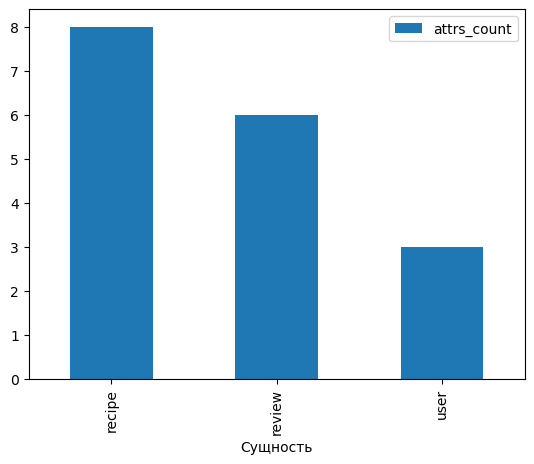

In [ ]:
#как-то не очень
group_df.plot.bar(x='Сущность', y='attrs_count')

In [ ]:
import seaborn as sns

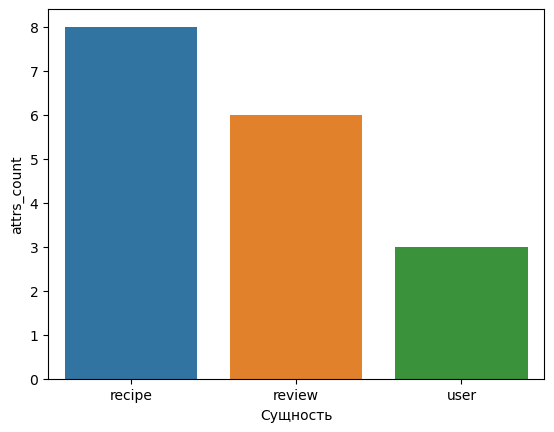

In [ ]:
fig = sns.barplot(data=group_df, x='Сущность', y='attrs_count')

<BarContainer object of 3 artists>

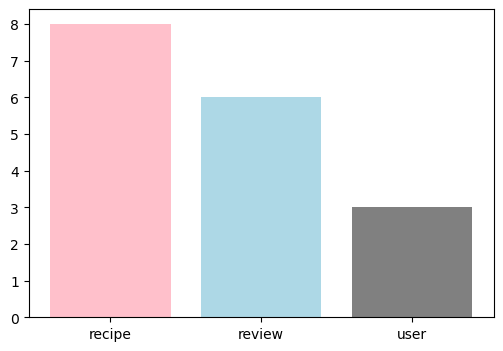

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(6, 4))
plt.bar(group_df['Сущность'], group_df['attrs_count'], color=['pink', 'lightblue', 'gray'])



In [ ]:
worksheet3.pictures.add(fig, anchor=worksheet3.range("E2"))

<Picture 'Picture 4' in <Sheet [recipes_model.xlsx]Статистика>>

![image.png](attachment:image.png)

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
df = pd.DataFrame(np.load('05_visualization_data/average_ratings.npy'), 
                  index=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']).T
df.head(2)

,waffle iron french toast,zwetschgenkuchen bavarian plum cake,lime tea
0,5.000000,7.00000,3.000000
1,5.013103,6.97075,2.996861


(1095,)
(1095,)
(1095,)


Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

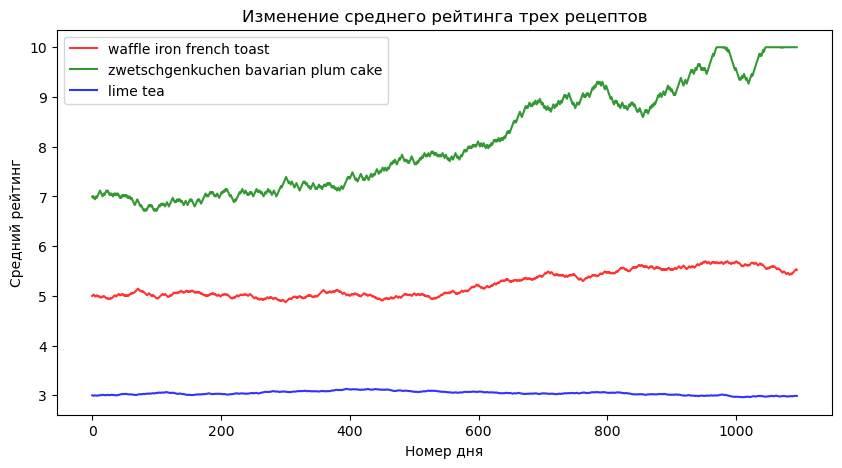

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

colors = ['red', 'green', 'blue']
for i, x in enumerate(df):
    print(df[x].shape)
    ax.plot(df[x], c=colors[i], label=x, alpha=0.8)
    
ax.legend()
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [ ]:
date_range = pd.date_range(start='01.01.2019', end='30.12.2021', freq='D')
date_range

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

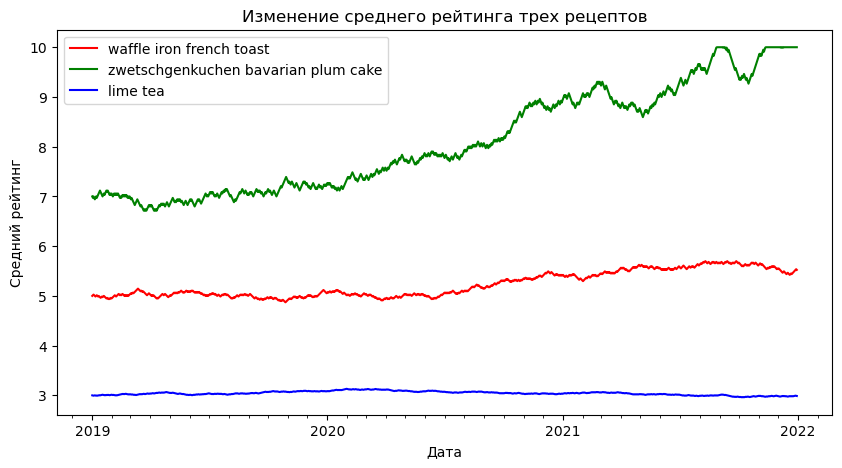

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

colors = ['red', 'green', 'blue']
for i, x in enumerate(df):
    ax.plot(date_range, df[x], c=colors[i], label=x)
    
ax.legend()
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0, 'Дата')

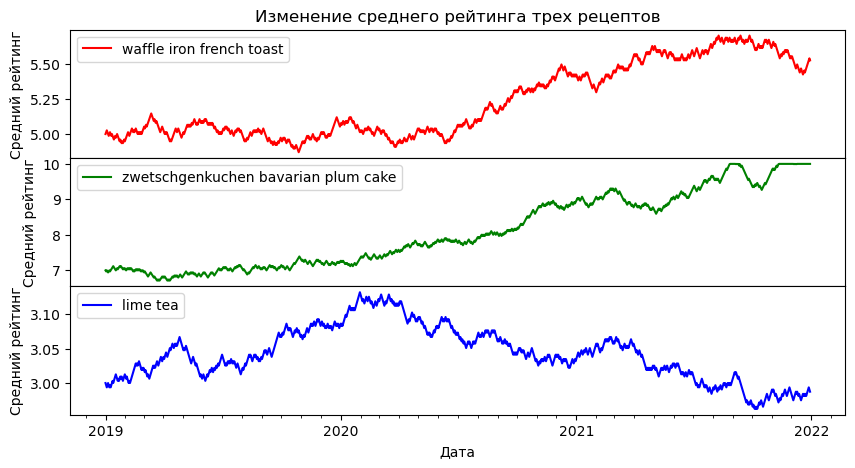

In [ ]:
#до этого делал общую ось через ax.xaxis.set_ticklabels([]) т.е. удаляя подписи
fig, axs = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
fig.subplots_adjust(hspace=0)
colors = ['red', 'green', 'blue']
for i, ax in enumerate(axs):
    ax.plot(date_range, df.iloc[:, i], c=colors[i], label=df.columns[i])
    ax.set_ylabel("Средний рейтинг")
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

        
axs[0].set_title("Изменение среднего рейтинга трех рецептов")
axs[2].set_xlabel("Дата")


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [ ]:
 ds.index.min(),  ds.index.max()

(0, 99)

In [ ]:
ds = pd.Series(np.load('05_visualization_data/visitors.npy'), name='visitors_count')

Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

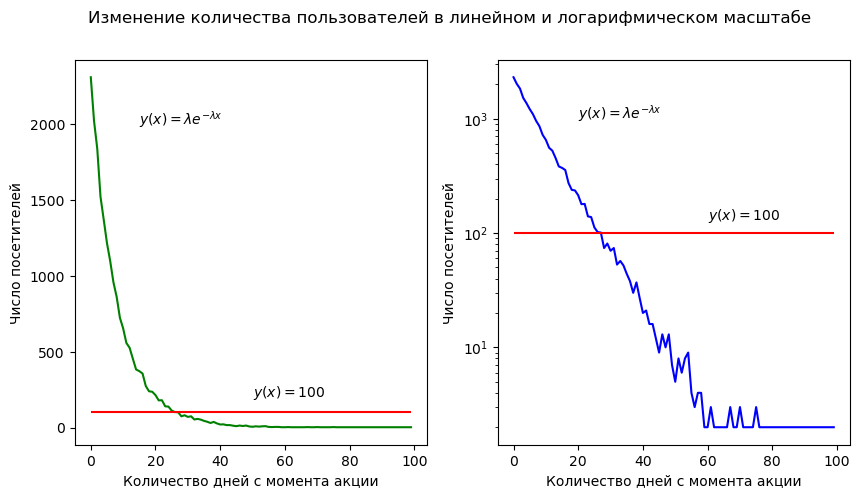

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

xmin, xmax =  ds.index.min(),  ds.index.max()
ax1.plot(ds, c='green')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel("Число посетителей")
ax1.annotate('$y(x)=\lambda e^{-\lambda x}$', (15, 2000))
ax1.hlines(y=100, xmin=xmin, xmax=xmax, colors='red')
ax1.annotate('$y(x)= 100$', (50, 200))

ax2.plot(ds, c='blue')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel("Число посетителей")
ax2.set_yscale('log')
ax2.annotate('$y(x)=\lambda e^{-\lambda x}$', (20, 1000))
ax2.hlines(y=100, xmin=xmin, xmax=xmax, colors='red')
ax2.annotate('$y(x)= 100$', (60, 130))

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')


### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('../02_pandas/02_pandas_data/recipes_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['submitted']
                )

reviews = pd.read_csv('../02_pandas/02_pandas_data/reviews_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['date'],
                 index_col=0
                )

In [ ]:
mask=20
f'RETR waybill_{mask:0>6}.xml'

'RETR waybill_000020.xml'

In [ ]:
recipes.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN


In [ ]:
reviews.head(2)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
recipes['term'] = None
recipes['term'][recipes.minutes < 5] = 'short'
recipes['term'][(recipes.minutes >= 5) & (recipes.minutes < 50)] = 'average'
recipes['term'][recipes.minutes  >= 50] = 'long'
#чтобы не было предупреждения лучше делать через df.loc[...]

C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_11376\1500822617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['term'][recipes.minutes < 5] = 'short'
C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_11376\1500822617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['term'][(recipes.minutes >= 5) & (recipes.minutes < 50)] = 'average'
C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_11376\1500822617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
df_for_plots = recipes[['term', 'n_steps', 'id']].groupby('term').aggregate({'id': 'count','n_steps': 'mean'})

Text(0, 0.5, '')

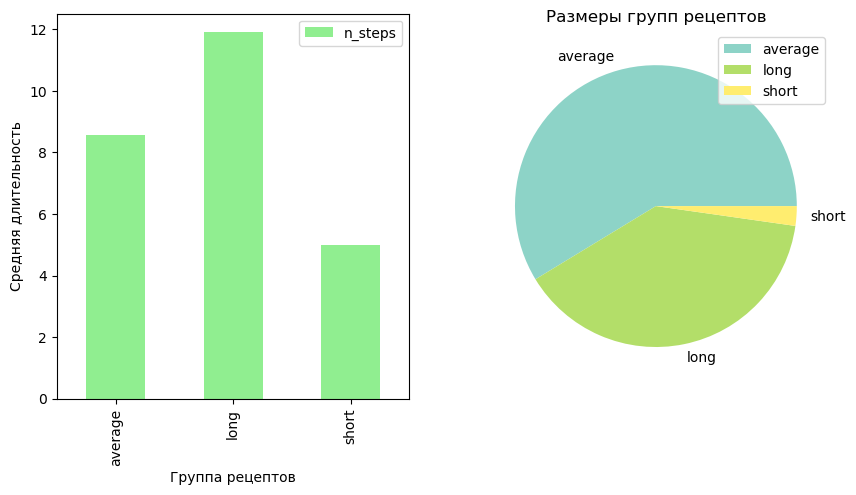

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#можно не указывать kind=..., а писать после плота: df.plot.pie(...), df.plot.bar(...)
df_for_plots.plot(kind='bar', 
                  y='n_steps', 
                  ax=ax1, 
                  xlabel='Группа рецептов',
                  ylabel='Средняя длительность',
                  color='lightgreen',
                  use_index=True) #use_index по умолчанию True

df_for_plots.plot(kind='pie', 
                  y='id', 
                  title='Размеры групп рецептов', 
                  ax=ax2, 
                  colormap='Set3',
                  use_index=True)
ax2.set_ylabel(None) #если в строке выше указзать ylabel=None - всё равно выводится

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
reviews['year'] = reviews.date.dt.year

<AxesSubplot:ylabel='Frequency'>

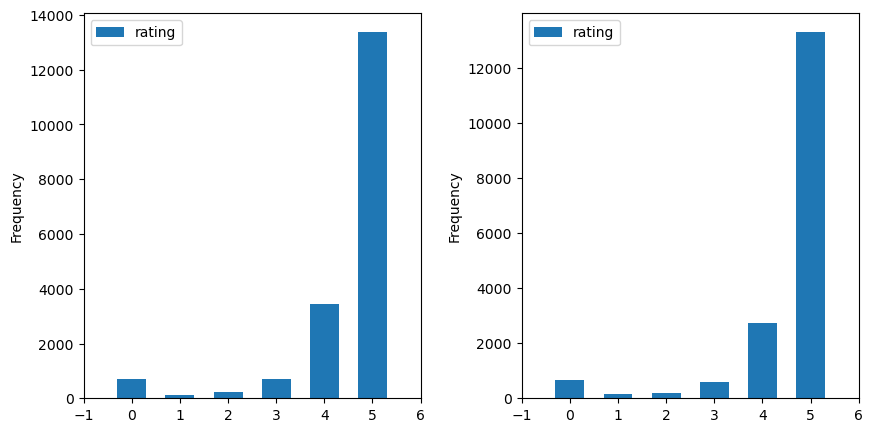

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

bins_arr = range(reviews.rating.min(), reviews.rating.max() + 2)
x_range = (reviews.rating.min() - 1,reviews.rating.max() + 1)

reviews[reviews.year == 2008].plot.hist(column='rating', 
                                        bins=bins_arr,
                                        xlim=x_range, 
                                        rwidth=0.6,
                                        align = "left",
                                        ax=ax1) 



reviews[reviews.year == 2009].plot.hist(column='rating', 
                                        bins=bins_arr,
                                        xlim=x_range, 
                                        rwidth=0.6,
                                        align = "left",
                                        ax=ax2)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [ ]:
sns.set_style("whitegrid")

[Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')]

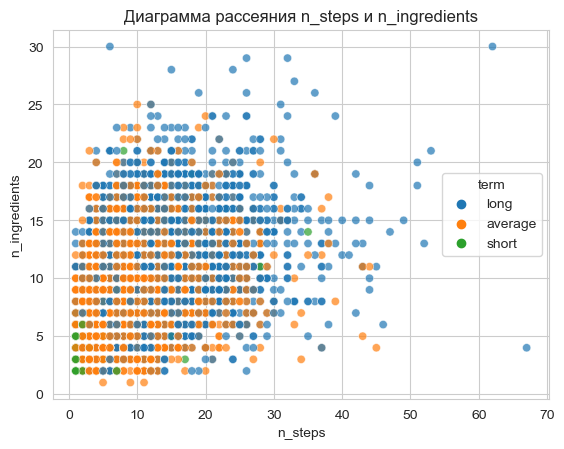

In [ ]:
sns.scatterplot(data=recipes,
                x='n_steps',
                y='n_ingredients',
                hue='term',
                alpha=0.7).set(title='Диаграмма рассеяния n_steps и n_ingredients')

## Лабораторная работа 6

### Форматирование строк

1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [ ]:
len('    61178     '), len('  minutes  ')

(14, 11)

In [ ]:
recipes = pd.read_csv('../02_pandas/02_pandas_data/recipes_sample.csv', 
                 sep=',', 
                 header=0,
                 parse_dates=['submitted']
                )

In [ ]:
sample = recipes[['id', 'minutes']].sample(5, replace=False)
arr = [sample.columns.str.strip()]
arr.extend(sample.values)
left_width = len(max(arr[:][0], key=lambda x: len(str(x))))
right_width = len(str(max(arr[:][1], key=lambda x: len(str(x)))))
for i, row in enumerate(arr):
    if i == 1: print('|'+'-'*(left_width + 8 + right_width + 4 + 1)+'|')
    print(f'|{row[0]:^{left_width + 8}}|{row[1]:^{right_width + 4}}|')

|      id       | minutes  |
|--------------------------|
|    502785     |    85    |
|    345103     |    11    |
|    482954     |    15    |
|     44177     |    55    |
|    376025     |    45    |


2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1
2. Шаг 2
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [ ]:
def show_info(name, steps, minutes, author_id):
    return f'"{name.title()}"\n'+''.join([f"\n{i + 1}. {s.capitalize()}" for i, s in enumerate(steps)]) \
        + f'\n----------\nАвтор: {author_id}\nСреднее время приготовления: {minutes} минут\n'

In [ ]:
assert (
    show_info(
        name="george s at the cove black bean soup",
        steps=[
            "clean the leeks and discard the dark green portions",
            "cut the leeks lengthwise then into one-inch pieces",
            "melt the butter in a medium skillet , med",
        ],
        minutes=90,
        author_id=35193,
    )
    == '"George S At The Cove Black Bean Soup"\n\n1. Clean the leeks and discard the dark green portions\n2. Cut the leeks lengthwise then into one-inch pieces\n3. Melt the butter in a medium skillet , med\n----------\nАвтор: 35193\nСреднее время приготовления: 90 минут\n'
)

In [ ]:
from bs4 import BeautifulSoup 
with open(
    '../03_data_files/03_data_files_data/steps_sample.xml',
    'r',
    encoding='utf-8'
) as fp:
    steps_sample = BeautifulSoup(fp)
    
steps = dict()
for recipe in  steps_sample.find_all('recipe'):
    steps[recipe.find('id').text] = [step.text for step in recipe.find_all('step')]

In [ ]:
id_170895 = recipes[recipes.id == 170895]

In [ ]:
show_recipe = show_info(
        name=id_170895.name.to_string(index=False),
        steps=steps[id_170895.id.to_string(index=False)],
        minutes=id_170895.minutes.to_string(index=False),
        author_id=id_170895.contributor_id.to_string(index=False),
    )

print(show_recipe)

"Leeks And Parsnips  Sauteed Or Creamed"

1. Clean the leeks and discard the dark green portions
2. Cut the leeks lengthwise then into one-inch pieces
3. Melt the butter in a medium skillet , med
4. Heat
5. Add the garlic and fry 'til fragrant
6. Add leeks and fry until the leeks are tender , about 6-minutes
7. Meanwhile , peel and chunk the parsnips into one-inch pieces
8. Place in a steaming basket and steam 'til they are as tender as you prefer
9. I like them fork-tender
10. Drain parsnips and add to the skillet with the leeks
11. Add salt and pepper
12. Gently sautee together for 5-minutes
13. At this point you can serve it , or continue on and cream it:
14. In a jar with a screw top , add the half-n-half and arrowroot
15. Shake 'til blended
16. Turn heat to low under the leeks and parsnips
17. Pour in the arrowroot mixture , stirring gently as you pour
18. If too thick , gradually add the water
19. Let simmer for a couple of minutes
20. Taste to adjust seasoning , probably an addi

### Работа с рег выраж 

3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [ ]:
recipes[recipes.id == 25082]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
2415,basic whole wheat bread,25082,290,25483,2002-04-13,18.0,"a simple, easy whole wheat bread recipe posted...",NaN


In [ ]:
import re

patt = re.compile(r"\d+\s(?:minute|hour)s?")
for step in steps['25082']:
    res = patt.findall(step)
    if res: print(res)

['20 minutes']
['10 minutes']
['2 hours']
['10 minutes']
['20 minutes', '30 minutes']


4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

In [ ]:
patt = re.compile(r"(^this(?:\w|\s)+,\s?but)") #re.I не нужен

df_with_patt = recipes[~recipes.description.str.extract(pat=patt).isna().values]  
df_with_patt.shape[0]

134

In [ ]:
print('\n\n'.join(df_with_patt.description.iloc[0:3].values))

this is a great meal eaten the same day ,but even better the next day , if you can wait! add your favourite spices, but try it first as it is and i think that you will enjoy the 'vegetable' taste. good for freezing.

this was adapted from a recipe i found on the net, but i added julienne onion to the peppers.  this is a meal in itself, or you could have a small slice with a meat dish.  for those that like to have brunch, it's a bit different to your traditional quiche recipes.  if you love cheese, you could add 1/2 cup of your favorite to the egg mixture, then pour over peppers.

this is kind of similar to some of the other versions out there, but it is the best and easiest i have found


5\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

In [ ]:
steps_72367 = steps['72367']
steps_72367

['mix butter , flour , 1 / 3 c',
 'sugar and 1-1 / 4 t',
 'vanilla',
 'press into greased 9" springform pan',
 'mix cream cheese , 1 / 4 c',
 'sugar , eggs and 1 / 2 t',
 'vanilla beating until fluffy',
 'pour over dough',
 'combine apples , 1 / 3 c',
 'sugar and cinnamon',
 'arrange on top of cream cheese mixture and sprinkle with almonds',
 'bake at 350 for 45-55 minutes , or until tester comes out clean']

In [ ]:
def del_space(match):
    return re.sub(r'\s+', '', match.group(0))

for i, step in enumerate(steps_72367):
    steps_72367[i] = re.sub(pattern=r"\d+\s+/\s+\d+", repl=del_space, string=step)

In [ ]:
steps_72367

['mix butter , flour , 1/3 c',
 'sugar and 1-1/4 t',
 'vanilla',
 'press into greased 9" springform pan',
 'mix cream cheese , 1/4 c',
 'sugar , eggs and 1/2 t',
 'vanilla beating until fluffy',
 'pour over dough',
 'combine apples , 1/3 c',
 'sugar and cinnamon',
 'arrange on top of cream cheese mixture and sprinkle with almonds',
 'bake at 350 for 45-55 minutes , or until tester comes out clean']

### Сегментация текста

6\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [ ]:
unique_words_set = set()

for stps in steps.values():
    for step in stps:
        unique_words_set.update(RegexpTokenizer(r'[a-z]+').tokenize(step.lower()))
        
len(unique_words_set)

NameError: name 'steps' is not defined

7\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
desc_len = recipes.description.apply(lambda x: len(nltk.sent_tokenize(str(x)))).sort_values(ascending=False)

In [ ]:
recipes.iloc[desc_len.index[:5]]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
18408,my favorite buttercream icing for decorating,334113,30,681465,2008-10-30,12.0,this wonderful icing is used for icing cakes a...,NaN
481,alligator claws avocado fritters with chipot...,287008,45,765354,2008-02-19,NaN,a translucent golden-brown crust allows the gr...,9.0
22566,rich barley mushroom soup,328708,60,221776,2008-10-03,NaN,this is one of the best soups i've ever made a...,10.0
16296,little bunny foo foo cake carrot cake with c...,316000,68,689540,2008-07-27,14.0,the first time i made this cake i grated a mil...,NaN
6779,chocolate tea,205348,6,428824,2007-01-14,NaN,i wrote this because there are an astounding l...,NaN


8\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
def show_part_of_speech(sentence):
    up_string, down_string = '', ''
    for word, speech_part in nltk.pos_tag(nltk.word_tokenize(sentence.values[0])):
        max_len = max(len(word), len(speech_part))
        up_string += f' {speech_part:^{max_len}}'
        down_string += f' {word:^{max_len}}'
    print(up_string[1:])
    print(down_string[1:])

In [ ]:
show_part_of_speech(recipes[recipes.id == 241106].name)

   JJ     NNS    IN     NNS    VBP    JJ   CC   JJ    NNS  
eggplant steaks with chickpeas feta cheese and black olives


## Лабораторная работа 7

In [ ]:
import pandas as pd
import re

1\. Загрузите данные из файла `ru_recipes_sample.csv` в виде `pd.DataFrame` `recipes` Используя регулярные выражения, удалите из описаний (столбец `description`) все символы, кроме русских букв, цифр и пробелов. Приведите все слова в описании к нижнему регистру. Сохраните полученный результат в столбец `description`.

In [ ]:
recipes = pd.read_csv('07_nlp_data/ru_recipes_sample.csv')
recipes.head(3)

,url,name,ingredients,description
0,https://www.povarenok.ru/recipes/show/164365/,Густой молочно-клубничный коктейль,"{'Молоко': '250 мл', 'Клубника': '200 г', 'Сах...",Этот коктейль готовлю из замороженной клубники...
1,https://www.povarenok.ru/recipes/show/1306/,Рулетики,"{'Сыр твердый': None, 'Чеснок': None, 'Яйцо ку...",Быстро и вкусно.
2,https://www.povarenok.ru/recipes/show/10625/,"Салат ""Баклажанчик""","{'Баклажан': '3 шт', 'Лук репчатый': '2 шт', '...","Сытный, овощной салатик, пальчики оближете."


In [ ]:
recipes.description = recipes.description.apply(lambda x: re.sub(r'[^а-я0-9\s]', '', str(x).lower()))
recipes.description.head(3)

0    этот коктейль готовлю из замороженной клубники...
1                                      быстро и вкусно
2             сытный овощной салатик пальчики оближете
Name: description, dtype: object

### Расстояние редактирования

2\. Получите набор уникальных слов `words`, содержащихся в текстах описаний рецептов (воспользуйтесь `word_tokenize` из `nltk`). Сгенерируйте 5 пар случайно выбранных слов и посчитайте между ними расстояние Левенштейна. Выведите на экран результат в следующем виде:

```
d(word1, word2) = x
```

In [ ]:
from nltk import word_tokenize

In [ ]:
words = word_tokenize(' '.join(recipes.description.array))
words[:5]

['этот', 'коктейль', 'готовлю', 'из', 'замороженной']

In [ ]:
import numpy as np
from nltk import edit_distance

for _ in range(5):
    word1, word2 = np.random.choice(words, replace=False, size=2)
    print(f'd({word1}, {word2}) = {edit_distance(word1, word2)}')

d(сырники, тетрадках) = 7
d(взрослых, сытная) = 8
d(фиников, дрожжевого) = 9
d(выпекать, самые) = 8
d(целый, баклажана) = 8


3\. Напишите функцию, которая принимает на вход 2 текстовые строки `s1` и `s2` и при помощи расстояния Левенштейна определяет, является ли строка `s2` плагиатом `s1`. Функция должна реализовывать следующую логику: для каждого слова `w1` из `s1` проверяет, есть в `s2` хотя бы одно слово `w2`, такое, что расстояние Левенштейна между `w1` и `w2` меньше 2, и считает количество таких слов в `s1` $P$. 

$$ P = \#\{w_1 \in s_1\ | \exists w_2 \in s_2 : d(w_1, w_2) < tol\}$$

$$ L = max(|s1|, |s2|) $$

Здесь $|\cdot|$ - количество слов в строке, $\#A$ - число элементов в множестве $A$, $w \in s$ означает, что слово $w$ содержится в тексте $s$.

Если отношение $P / L$ больше 0.8, то функция должна вернуть True; иначе False.

Продемонстрируйте работу вашей функции на примере описаний двух рецептов с ID 135488 и 851934 (ID рецепта - это число, стоящее в конце url рецепта). Выведите на экран описания этих рецептов и результат работы функции.

In [ ]:
recipes['id'] = recipes.url.str.extract(r'/(\d+)/').astype(int)
#recipes = recipes.set_index('id')

In [ ]:
def is_plagiarism(s1: str, s2: str) -> bool:
    words1, words2 = word_tokenize(s1), word_tokenize(s2)
    count_plag = 0
    for word1 in words1:
        for word2 in words2:
            if edit_distance(word1, word2) < 2:
                count_plag += 1
    L = max(len(words1), len(words2))
    return True if count_plag > 0.8 else False
                
        
        

In [ ]:
s1, s2 = recipes[recipes.id == 135488].description.values[0], recipes[recipes.id == 851934].description.values[0]
is_plagiarism(s1, s2)

True

In [ ]:
s1

'прекрасной закуской к крепким напиткам на фуршетном столе станет паштет из сала и авокадо с чесноком который мы спрячем в орешках из бородинского хлеба положив в середину маслину закуска получается необычной оригинальной и ценится особенно мужчинами'

s2

In [ ]:
s2

'замечательной закуской к напиткам на фуршетном столе станет паштет из сала и авокадо с чесноком куда мы добавим орешков из бородинского хлеба положив в середину маслины закуска получается крайне необычной оригинальной и ценится особенно мужчинами'

### Стемминг, лемматизация

4\. На основе набора слов из задания 2 создайте `pd.DataFrame` со столбцами `word`, `stemmed_word` и `normalized_word`. В столбец `stemmed_word` поместите версию слова после проведения процедуры стемминга; в столбец `normalized_word` поместите версию слова после проведения процедуры лемматизации. Столбец `word` укажите в качестве индекса. 

Для стемминга можно воспользоваться `SnowballStemmer` из `nltk`, для лемматизации слов - пакетом `pymorphy2`. Сравните результаты стемминга и лемматизации. Поясните на примере одной из строк получившегося фрейма (в виде текстового комментария), в чем разница между двумя этими подходами. 

In [ ]:
from nltk.stem import SnowballStemmer
import pymorphy2

stemmer = SnowballStemmer("russian")
morph = pymorphy2.MorphAnalyzer()

words_df = pd.DataFrame(
    {'word': words,
    'stemmed_word': [stemmer.stem(w) for w in words],
    'normalized_word': [morph.parse(w)[0].normalized.word for w in words]
    }
).set_index('word')


In [ ]:
words_df.head(3)

,stemmed_word,normalized_word
word,,
этот,этот,этот
коктейль,коктейл,коктейль
готовлю,готовл,готовить


Стемминг - обрезает окончания (грубо говоря выделяет морфологическую "основу"), лемматизация же приводит слова в начальную форму

5\. Добавьте в таблицу `recipes` столбец `description_no_stopwords`, в котором содержится текст описания рецепта после удаления из него стоп-слов. Посчитайте и выведите на экран долю стоп-слов среди общего количества слов. Сравните топ-10 самых часто употребляемых слов до и после удаления стоп-слов.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
count_stopwords, count_words = 0, 0
stopwords = stopwords.words('russian')
stopwords[:5]

['и', 'в', 'во', 'не', 'что']

In [ ]:
recipes['description_no_stopwords'] = recipes.description.apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if not word in stopwords]))

In [ ]:
recipes[['description', 'description_no_stopwords']].tail(5)

,description,description_no_stopwords
3462,для тех кто любит чечевицу вам сюда очень вкус...,тех любит чечевицу сюда очень вкусная чечевичн...
3463,баклажановые фантазии продолжаются предлагаю в...,баклажановые фантазии продолжаются предлагаю в...
3464,мое любимое блюдо лазанья но кушать только фар...,мое любимое блюдо лазанья кушать фарш поднадое...
3465,прошлым летом варила варенье из одуванчиков по...,прошлым летом варила варенье одуванчиков рецеп...
3466,и три корочки хлеба сделал заказ буратино в ...,корочки хлеба сделал заказ буратино таверне до...


In [ ]:
count_all_words = recipes.description.apply(lambda x: len(word_tokenize(x))).sum()
count_no_stopwords = recipes.description_no_stopwords.apply(lambda x: len(word_tokenize(x))).sum()

In [ ]:
print(f'Доля стоп-слов среди общего количества слов:\n{(count_all_words - count_no_stopwords) / count_all_words}')

Доля стоп-слов среди общего количества слов:
0.32267086173745846


In [ ]:
words_all, words_no_stopwords = [], []

for  row in recipes[['description', 'description_no_stopwords']].to_numpy():
    s1, s2 = row[0], row[1]
    words_all.extend(word_tokenize(s1))
    words_no_stopwords.extend(word_tokenize(s2))
    

In [ ]:
#можно то же самое сделать и с Counter()
from nltk import FreqDist


print('топ-10 со стоп-словами:')
FreqDist(words_all).most_common(10)

топ-10 со стоп-словами:


[('и', 5054),
 ('в', 2584),
 ('с', 1934),
 ('на', 1655),
 ('очень', 1607),
 ('не', 1522),
 ('из', 1006),
 ('я', 979),
 ('рецепт', 869),
 ('а', 863)]

In [ ]:
print('топ-10 без стоп-слов:')
FreqDist(words_no_stopwords).most_common(10)

топ-10 без стоп-слов:


[('очень', 1607),
 ('рецепт', 869),
 ('это', 734),
 ('блюдо', 524),
 ('вкусный', 461),
 ('просто', 436),
 ('вкусно', 375),
 ('приготовить', 344),
 ('вкус', 324),
 ('салат', 313)]

### Векторное представление текста

6\. Выберите случайным образом 5 рецептов из набора данных, в названии которых есть слово "оладьи" (без учета регистра). Представьте описание каждого рецепта в виде числового вектора при помощи `TfidfVectorizer`. На основе полученных векторов создайте `pd.DataFrame`, в котором названия колонок соответствуют словам из словаря объекта-векторизатора. 

Примечание: обратите внимание на порядок слов при создании колонок.

In [ ]:
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
oladushki_recipes = recipes[['name', 'description']][recipes.description.str.contains('оладьи')].sample(5, replace=False)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
oladushki_df = pd.DataFrame(data=vectorizer.fit_transform(oladushki_recipes.description).toarray(), 
                            columns=vectorizer.get_feature_names_out())
oladushki_df

,ассоциируются,более,брокколи,быстро,быть,варенье,вкусно,вкусные,вкусными,временем,...,укропом,утром,форме,чемто,что,чуть,шарообразной,шоколадный,эти,этим
0,0.16647,0.000000,0.000000,0.000000,0.16647,0.000000,0.000000,0.000000,0.000000,0.16647,...,0.16647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.16647,0.16647
1,0.00000,0.116353,0.000000,0.116353,0.00000,0.116353,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.116353,0.116353,0.116353,0.116353,0.116353,0.116353,0.00000,0.00000
2,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.211636,0.00000,...,0.00000,0.211636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,0.00000,0.000000,0.265278,0.000000,0.00000,0.000000,0.265278,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
4,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.371041,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


7\. Вычислите близость между каждой парой рецептов, выбранных в задании 6, используя косинусное расстояние (можно воспользоваться функциями из любого пакета: `scipy`, `scikit-learn` или реализовать функцию самому). Результаты оформите в виде таблицы `pd.DataFrame`. В качестве названий строк и столбцов используйте названия рецептов.

Примечание: обратите внимание, что $d_{cosine}(x, x) = 0$

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
cos_dist_oladushki = pd.DataFrame(data=cosine_distances(oladushki_df), 
                                  columns=oladushki_recipes.name,
                                  index=oladushki_recipes.name)
cos_dist_oladushki

name,"Картофельные оладьи с соусом ""Весна""",Голландские лимонные оладьи,Картофельно-творожные оладьи,Оладьи из брокколи с сыром,Нежные куриные оладьи
name,,,,,
"Картофельные оладьи с соусом ""Весна""",0.000000,0.953381,0.946136,0.922456,0.985975
Голландские лимонные оладьи,0.953381,0.000000,0.977773,0.951875,0.922306
Картофельно-творожные оладьи,0.946136,0.977773,0.000000,0.974505,0.876511
Оладьи из брокколи с сыром,0.922456,0.951875,0.974505,0.000000,0.955302
Нежные куриные оладьи,0.985975,0.922306,0.876511,0.955302,0.000000


8\. Напишите функцию, которая принимает на вход `pd.DataFrame`, полученный в задании 7, и возвращает в виде кортежа названия двух различных рецептов, которые являются наиболее похожими. Прокомментируйте результат (в виде текстового комментария). Для объяснения результата сравните слова в описаниях двух этих отзывов.

In [ ]:
def find_closest(sim_df: pd.DataFrame) -> tuple:
    array = sim_df.to_numpy()
    array[array == 0] = np.inf
    amin = array.argmin()
    return (sim_df.index[amin // 5], sim_df.columns[amin % 5])

In [ ]:
name1, name2 = find_closest(cos_dist_oladushki)
name1, name2

('Картофельно-творожные оладьи', 'Нежные куриные оладьи')

In [ ]:
oladushki_recipes[oladushki_recipes.name == name1].description.to_numpy()[0]

'картофельное пюре оставшееся с ужина утром можно превратить в сытный и полезный завтрак дополнив его еще несколькими ингредиентами а именно в картофельнотворожные оладьи которые получаются нежными необычными и очень вкусными'

In [ ]:
oladushki_recipes[oladushki_recipes.name == name2].description.to_numpy()[0]

'нежные сочные оладьи и очень очень очень вкусные'

Очевидно, что расстояние такое большое, по причине несхожести рецептов. Кол-во слов сильно разнится + во втором названии рецепта есть только 3 слова-плагиата, которые повторяются в первом: оладьи, очень, вкусные. 

## Лабораторная работа 8

In [ ]:
import numpy as np
import pandas as pd
from numba import jit, njit
import numba
from typing import Union

%load_ext line_profiler

В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

In [ ]:
recipes = pd.read_csv('08_profiling_data/recipes_sample.csv', 
                 sep=',', 
                 parse_dates=['submitted']
                )


reviews = pd.read_csv('08_profiling_data/reviews_sample.csv', 
                 sep=',', 
                 parse_dates=['date'],
                 index_col=0
                )

In [ ]:
print(reviews.dtypes, '\n' * 3, recipes.dtypes, sep='')

user_id               int64
recipe_id             int64
date         datetime64[ns]
rating                int64
review               object
dtype: object


name                      object
id                         int64
minutes                    int64
contributor_id             int64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients            float64
dtype: object


### Измерение времени выполнения кода

Назовем полным описанием рецепта строку, полученную путем конкатенации названия и описания рецепта через пробел. Удалите строки для рецептов, которые были добавлены не в 2010 году.

Реализуйте несколько вариантов функции подсчета средней длины полного описания рецепта для рецептов, добавленных в 2010 году.

In [ ]:
recipes['full_desc'] = recipes.name + ' ' + recipes.description
recipes.drop(np.where(recipes.submitted.dt.year != 2010)[0], inplace=True)
recipes.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,full_desc
52,just peachy cobbler,437637,70,1085867,2010-09-17,10.0,all i can say is yummmmmm . . . a simple to ma...,10.0,just peachy cobbler all i can say is yummmmmm...
68,the heat spicy party mix,437219,95,1682162,2010-09-13,NaN,a spicy chex mix that will really warm your gu...,11.0,the heat spicy party mix a spicy chex mix tha...
81,iowa state fair sweet dough caramel cinnamon ...,435816,80,17803,2010-08-24,29.0,this was the winning entry at the 2010 iowa st...,NaN,iowa state fair sweet dough caramel cinnamon ...


**1\.1** С использованием метода `DataFrame.iterrows` таблицы:

    - функция принимает на вход таблицу, содержащую рецепты за 2010 год;
    
    - нахождение полного описания рецепта осуществляется внутри цикла по `iterrows` для каждой строки по отдельности.

In [ ]:
def get_full_desc()

In [ ]:
def get_mean_len_A(df: pd.DataFrame) -> float:
    len_A = 0
    for _, row in df.iterrows():
        len_A += len(row.full_desc)
    return len_A / df.shape[0]
        

In [ ]:
%time get_mean_len_A(recipes)

CPU times: total: 203 ms
Wall time: 216 ms


265.501300390117

1\.2. С использованием метода `DataFrame.apply` таблицы:

    - функция принимает на вход таблицу, содержащую рецепты за 2010 год;
    
    - вызываете метод apply у таблицы, в качестве аргумента передаете функцию, которая возвращает полное описание для каждой строки;
    
    - считаете среднюю длину описаний, вызвав соответствующий метод серии.

In [ ]:
def get_mean_len_B(df: pd.DataFrame) -> float:
    return df[['name', 'description']].apply(lambda x: x['name'] + ' ' + x.description, axis=1).str.len().mean()
#name зарезирвировано, поэтому через . не получается обратиться

1\.3. С использованием векторизованных методов серий `pd.Series`:

    - функция принимает на вход таблицу, содержащую рецепты за 2010 год;
    
    - при помощи векторизированных операций получаете столбец с полным описанием;
    
    - при помощи векторизированных операций получаете длины полного описания;
    
    - при помощи векторизированных операций получаете среднюю длину полных описаний. 

In [ ]:
def get_mean_len_C(df: pd.DataFrame) -> float:
    return (recipes.name + ' ' + recipes.description).str.len().mean()

1.4 Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций при помощи магических команд `time` и `timeit`.

In [ ]:
for letter in ('A', 'B', 'C'):
    func_name = f'get_mean_len_{letter}'
    func = eval(func_name)
    print(func_name)
    %time print(func(recipes))
    %timeit func(recipes)
    print('\n-----------\n')

get_mean_len_A
265.501300390117
CPU times: total: 141 ms
Wall time: 143 ms
138 ms ± 5.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

-----------

get_mean_len_B
265.501300390117
CPU times: total: 62.5 ms
Wall time: 59.8 ms
62 ms ± 5.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

-----------

get_mean_len_C
265.501300390117
CPU times: total: 0 ns
Wall time: 3.99 ms
2.5 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

-----------



### Анализ пошагового выполнения кода 

Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. 

In [ ]:
import re


def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=["review"]).iterrows():
        recipe_id, review = row["recipe_id"], row["review"]
        words = re.sub("[^A-Za-z\s]", "", review).split(" ")
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)

    word_reviews_count = {}
    for _, row in df.dropna(subset=["review"]).iterrows():
        review = row["review"]
        words = re.sub("[^A-Za-z\s]", "", review).split(" ")
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
    return word_reviews_count

2.1 Найдите узкие места в коде, проанализировав код функции по шагам, используя профайлер. Сохраните результаты работы профайлера в отдельную текстовую ячейку. Выпишите (словами), что в имеющемся коде реализовано неоптимально. 

In [ ]:
# %lprun -f get_word_reviews_count get_word_reviews_count(reviews)

![image.png](attachment:image.png)

Показывает, что циклы выполняются долго...... 


наример строка `recipe_id, review = row["recipe_id"], row["review"]`



выполняется 24.8 секунды.........

Неоптимально: как минимум использование двух циклов, 

заместо одного (в первом собираются все слова, а во втором проверяются их вхождения)


более того, необходимость использования циклов под вопросом....

вместо вложенных циклов, можно использовать встроенные векторизированные функции для работы с регулярками например exctract, .str.len() и т.д.


Так же очень долго присваивается значение по ключу в словарь: 9.1 секунда

2.2  Оптимизируйте функцию и добейтесь значительного (как минимум, в 5 раз) прироста в скорости выполнения. Для демонстрации результата измерьте скорость выполнения оригинальной функции и функции, написанной вами.

In [ ]:
from collections import Counter  #работает быстрее чем FreqDict
from nltk.tokenize import RegexpTokenizer


# неверное решение.
def get_word_reviews_count_optimize(reviews):  
    return Counter(RegexpTokenizer(r'\w+').tokenize(' '.join(reviews.review.dropna())))

In [ ]:
# почему-то принтует dict, поэтому обернул в цикл
for func in (get_word_reviews_count, get_word_reviews_count_optimize):
    %time func(reviews)
    print()

CPU times: total: 38.6 s
Wall time: 38.6 s

CPU times: total: 5.33 s
Wall time: 5.33 s



In [ ]:
# так будет правильнее
def get_word_reviews_count_optimize(reviews):  
    counter = Counter()
    col = reviews.review.dropna().apply(lambda x: list(set(RegexpTokenizer(r'\w+').tokenize(str(x)))))
    for ls in col:
        counter.update(ls)
    return counter

In [ ]:
# а этот ещё быстрее
def get_word_reviews_count_optimize(reviews):  
    counter = Counter()
    col = reviews.review.dropna().apply(lambda x: re.sub("[^A-Za-z\s]", " ", str(x)).split())
    for ls in col:
        counter.update(ls)
    return counter

In [ ]:
#самая быстрая!
def get_word_reviews_count_optimize(reviews):  
    return Counter(reviews.review.dropna().apply(lambda x: re.sub("[^A-Za-z\s]", " ", str(x)).split()).explode().values)

In [ ]:
%timeit get_word_reviews_count_optimize(reviews)

5.46 s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
for func in (get_word_reviews_count, get_word_reviews_count_optimize):
    %timeit func(reviews)
    print()

46.3 s ± 1.96 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

6.7 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



### Numba

В файле `rating_predictions.json` хранятся данные о рейтингах рецептов и прогнозных значениях рейтингов для этого рецепта, полученных при помощи модели машинного обучения. 

Напишите несколько версий функции (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от прогнозного значения рейтинга для данного рецепта. 


Замечание 1: в формуле MAPE под $A_t$ понимается рейтинг из отзыва $t$, под $F_t$ - прогнозное значения рейтинга отзыва $t$.

Замечание 2: в результате работы функций должно получиться одно число - MAPE для всего набора данных.

In [ ]:
ratings = pd.read_json('08_profiling_data./rating_predictions.json')
ratings.head(3)

,rating,prediction
0,5,4.944444
1,5,4.437500
2,5,4.727273


3\.1 Создайте два списка `A_list` и `F_list` на основе файла `rating_predictions.json`. Напишите функцию `mape_lists` без использования векторизованных операций и методов массивов `numpy` и без использования `numba` (проитерируйтесь по спискам и вычислите суммарное значение MAPE для всех элементов, а потом усредните результат).

Измерьте время выполнения данной функции на входных данных `A_list` и `F_list`. Временем, затрачиваемым на создание списков, можно пренебречь.
    

In [ ]:
A_list, F_list = ratings.rating.to_list(),  ratings.prediction.to_list()

In [ ]:
def mape_list(A_list, F_list):
    length, mape = 0, 0
    for A in A_list:
        mape += abs((A - F_list[length]) / A) 
        length += 1
    return mape * 100 / length

In [ ]:
mape_list(A_list, F_list)

13.325265503992638

In [ ]:
%timeit mape_list(A_list, F_list)

49.4 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


3\.2. Создайте массивы `numpy` `A_array` и `F_array` на основе списков `A_list` и `F_list`. Напишите функцию `mape_numpy` с использованием векторизованных операций и методов массивов `numpy`.

Измерьте время выполнения данной функции на входных данных `A_array` и `F_array`. Временем, затрачиваемым на создание массивов, можно пренебречь.

In [ ]:
import numpy as np


def mape_numpy(A_array, F_array):
    return (np.abs((A_array - F_array) / A_array)).mean() * 100

In [ ]:
A_array, F_array = np.array(A_list), np.array(F_list)

In [ ]:
mape_numpy(A_array, F_array)

13.32526550399145

In [ ]:
%timeit mape_numpy(A_array, F_array)

708 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


3\.3. Создайте объекты `numba.typed.List` `A_typed` и `F_typed` на основе списков `A_list` и `F_list`. Напишите функцию `mape_numba` без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`. 

Измерьте время выполнения данной функции на входных данных `A_typed` и `F_typed`. Временем, затрачиваемым на создание объектов `numba.typed.List`, можно пренебречь.

Измерьте время выполнения данной функции на входных данных `A_numpy` и `F_numpy`.

In [ ]:
from numba import prange

@njit
def mape_numba(A_typed, F_typed):
    mape = 0
    n = len(A_typed)
    for i in prange(n):
        mape += abs((A_typed[i] - F_typed[i]) / A_typed[i])
    return (mape / n) * 100

In [ ]:
A_typed, F_typed  = numba.typed.List(A_list), numba.typed.List(F_list)

In [ ]:
mape_numba(A_typed, F_typed)

13.325265503992636

In [ ]:
%timeit mape_numba(A_typed, F_typed)

2.55 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit mape_numba(A_array, F_array)

259 µs ± 4.26 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Векторизация

Сайт-агрегатор устроил акцию: он дарит купоны на посещение ресторана тем пользователям, оставившим отзывы, идентификатор которых является _красивым числом_. Натуральное число называется _красивым_, если первая цифра числа совпадает с последней цифрой числа. 



In [ ]:
ids = reviews['recipe_id'].values
# но, чтобы выполнялось условие, нужно на самом деле писать:
#хотя хз...
ids = np.unique(reviews['user_id'].dropna().values)

4\.1 Напишите функцию `is_pretty`, которая для каждого идентификатора пользователя из файла определяет, получит ли он подарок. Запрещается преобразовывать идентификатор пользователя к строке. Подтвердите корректность реализации, продемонстрировав примеры.

In [ ]:
def is_pretty(n: int) -> bool:
    last = n % 10
    while n >=  10:
        n //= 10  
    first = n
    if last == first:
        return True
    else: 
        return False

In [ ]:
is_pretty(123431), is_pretty(123432)

(True, False)

4\.2 Посчитайте с помощью функции `is_pretty` количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.

In [ ]:
np.array(list(map(is_pretty, ids))).astype(int).sum()

4389

In [ ]:
%timeit np.array(list(map(is_pretty, ids))).astype(int).sum()

225 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit 
count = 0
for Id in ids:
    if is_pretty(Id):
        count += 1

217 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


4\.3. При помощи `numpy` создайте векторизованную версию функции `is_pretty`. Посчитайте с помощью этой векторизованной функции количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.


In [ ]:
np_vec_func = np.vectorize(is_pretty)
np_vec_func(ids).astype(int).sum()

4389

In [ ]:
%timeit np_vec_func(ids).astype(int).sum()

263 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


4\.4. При помощи `numba` создайте векторизованную версию функции `is_pretty`. Посчитайте с помощью этой векторизованной функции количество пользователей, которые получат подарок. Выведите это количество на экран. Измерьте время расчетов для входных данных `ids`.


In [ ]:
nb_vec_func = numba.vectorize()(is_pretty)
np.array(nb_vec_func(ids)).astype(int).sum()

4389

In [ ]:
%timeit np.array(nb_vec_func(ids)).astype(int).sum()

556 µs ± 5.87 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Лабораторная работа 9

### Создание и заполнение базы данных

1\. Создайте файл БД sqlite3 согласно рисунку ниже, на котором определен набор таблиц и связей между ними. Обратите внимание, что поля, выделенные полужирным шрифтом, обозначают первичный ключ таблицы.

Для решения задания напишите скрипт на языке SQL и исполните его при помощи метода `executescript` объекта-курсора.

![image-4.png](attachment:image-4.png)

In [ ]:
def drop_all_tables(cursor=cursor, tables_name=['Recipe', 'Tag', 'Ingredient', 'Review']):
    for tab_name in tables_name: 
        cursor.execute(f'DROP TABLE IF EXISTS {tab_name}')

#drop_all_tables()

In [ ]:
cursor.executescript(""" CREATE TABLE IF NOT EXISTS Recipe(
                      id INT PRIMARY KEY,
                      name VARCHAR,
                      minutes INT,
                      submitted VARCHAR,
                      description TEXT,
                      n_ingredients INT);
                      
                      CREATE TABLE IF NOT EXISTS Tag(
                      tag VARCHAR,
                      recipe_id INT,
                      FOREIGN KEY (recipe_id) REFERENCES Recipe(id),
                      PRIMARY KEY (tag, recipe_id)
                      );
                      
                      CREATE TABLE IF NOT EXISTS Ingredient(
                      ingredient_name VARCHAR,
                      recipe_id INT,
                      FOREIGN KEY (recipe_id) REFERENCES Recipe(id)
                      PRIMARY KEY (ingredient_name, recipe_id)
                      );
                      
                      CREATE TABLE IF NOT EXISTS Review(
                      id INT PRIMARY KEY,
                      user_id INT,
                      recipe_id INT,
                      date VARCHAR,
                      rating INT,
                      review TEXT,
                      FOREIGN KEY (recipe_id) REFERENCES Recipe(id));   
""")

2\. Загрузите данные из файла `recipes_sample.csv` в таблицу `Recipe`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора.

In [ ]:
import pandas as pd 


recipes_df = pd.read_csv('09_database_data/recipes_sample.csv', encoding='utf-8')
recipes_df.head(3)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0


In [ ]:
recipes_df.drop(['contributor_id', 'n_steps'], axis=1, inplace=True)
recipes_df.head(3)

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0


In [ ]:
cursor.executemany(f'INSERT INTO Recipe({", ".join(recipes_df.columns)}) VALUES (?, ?, ?, ?, ?, ?);', recipes_df.values)

3\. Загрузите данные из файла `tags_sample.pickle` в таблицу `Tag`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора. Для считывания файла с данными воспользуйтесь пакетом `pickle`.

In [ ]:
import pickle


with open('09_database_data/tags_sample.pickle', 'rb') as f:
    tags_sample = pickle.load(f)

In [ ]:
tags_df = pd.DataFrame(tags_sample).explode('tag')
tags_df.head(5)

,id,tag
0,48,eggs-dairy
0,48,course
0,48,main-ingredient
0,48,weeknight
0,48,north-american


In [ ]:
cursor.executemany(f'INSERT INTO Tag(recipe_id, tag) VALUES (?, ?);', tags_df.values)

4\. Загрузите данные из файла `reviews_sample.csv` в таблицу `Review`. При выполнении задания воспользуйтесь методом `pd.DataFrame.to_sql`.

In [ ]:
reviews_df = pd.read_csv('09_database_data/reviews_sample.csv', encoding='utf-8', index_col=0)
reviews_df.head(3)

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."


In [ ]:
reviews_df.to_sql('Review', con=connection, if_exists='append', index_label='id')

126696

5\. Загрузите данные из файла `ingredients_sample.csv` в таблицу `Ingredients`. При выполнении задания воспользуйтесь методом `DataFrame.to_sql`.

Обратите внимание, перед вызовом метода `to_sql` вам требуется привести фрейм к соответствующему таблице в БД виду.

In [ ]:
ingredients_df = pd.read_csv('09_database_data/ingredients_sample.csv', encoding='utf-8')
ingredients_df.head(3)

,recipe,ingredients
0,48,cornstarch;milk;eggs;margarine;butter;flour;sa...
1,55,salt;tomatoes;garlic;lime juice;avocados
2,66,onion;worcestershire sauce;ketchup;garlic clov...


In [ ]:
ingredients_df.rename(columns={'recipe': 'recipe_id', 'ingredients': 'ingredient_name'}, inplace=True)

In [ ]:
ingredients_df.to_sql('Ingredient', con=connection, if_exists='append', index=False)

30000

### Получение данных из базы

6\. Напишите и выполните запрос на языке SQL, который считает кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут. Для выполнения запроса используйте метод `execute` объекта-курсора. Выведите искомое количество на экран.

In [ ]:
print(f'Кол-во рецептов по заданному условию:')
cursor.execute("SELECT COUNT(*) FROM Recipe WHERE minutes > 15 and submitted LIKE '2010%';").fetchone()[0]

Кол-во рецептов по заданному условию:


1244

7\. Напишите и выполните запрос на языке SQL, который возращает id рецептов, не имеющих ни одного отзыва отзывов с рейтингом, меньше 4. Для выполнения запроса используйте функцию `pd.read_sql_query`. Выведите полученный результат на экран.

In [ ]:
sql_query = '''SELECT recipe_id FROM Review
    GROUP BY recipe_id
    HAVING MIN(rating) >= 4'''
pd.read_sql_query(sql=sql_query, con=connection)

,recipe_id
0,55
1,66
2,91
3,94
4,128
...,...
20461,536360
20462,536473
20463,536547
20464,536728


In [ ]:
#посмотрим на примере рецепта с id == 55
reviews_df[reviews_df['recipe_id'] == 55]

,user_id,recipe_id,date,rating,review
462145,165567,55,2006-03-31,5,I LOVED this recipe! I was looking for a guaca...
462147,851190,55,2010-05-23,5,I used Italian plum tomatoes for this as they ...
462144,53959,55,2006-01-12,4,I liked it. I was surprised since it didn't ha...
462146,1060485,55,2009-04-07,5,loved this! my family ate it all up! will deff...


8\. Создайте `pd.DataFrame`, содержащий данные из таблицы `Tag`. Создайте `pd.DataFrame`, содержащий данные из таблицы `Recipe` (для создания фреймов можно воспользоваться функцией `read_sql_query`). 

Используя механизмы группировки и объединения, которые предоставляет `pandas`, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. Измерьте время выполнения работы вашего кода (в замеры включите время, которое тратится на загрузку таблиц).

In [ ]:
%%time
tag_df = pd.read_sql_query(sql='SELECT * FROM Tag', con=connection)
recipe_df = pd.read_sql_query(sql='SELECT * FROM Recipe', con=connection)
# есть такая вещь как .nlargest(5) и nsmallest() вместо сортинга и среза
top_5 = tag_df.groupby('recipe_id').count().sort_values(by='tag', ascending=False)[: 5]
top_5.merge(recipe_df, how='inner', left_on='recipe_id', right_on='id')[['name', 'tag']].rename(columns={'tag': 'tags_count'})

CPU times: total: 2.08 s
Wall time: 2.14 s


,name,tags_count
0,watermelon basket fruit salad,58
1,creamsicle freeze,56
2,easy poached salmon with dill,53
3,curried crab asparagus cheesy tofu dip,53
4,fusion ketchup,52


9\. Используя механизмы группировки и объединения, которые предоставляет SQL, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. При выполнении задания воспользуйтесь методом `execute` объекта-курсора. Измерьте время выполнения работы вашего кода.

Вся необходимая логика (группировки, объединения, выбор топ-5 строк) должна быть реализована на SQL, а не в виде кода на Python.

In [ ]:
%%time
sql_query = ''' SELECT name, tags_count FROM Recipe
    JOIN (SELECT recipe_id, count(tag) as tags_count FROM Tag
        GROUP BY recipe_id
        ORDER BY tags_count DESC
        LIMIT 5) 
    ON recipe_id = id
    '''
cursor.execute(sql_query).fetchall()

CPU times: total: 797 ms
Wall time: 779 ms


[('watermelon basket fruit salad', 58),
 ('creamsicle freeze', 56),
 ('easy poached salmon with dill', 53),
 ('curried crab asparagus cheesy tofu dip', 53),
 ('fusion ketchup', 52)]

10\. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсуствует, выведите соответствующее сообщение. Для подстановки значения id необходимо воспользоваться специальным синтаксисом, которые предоставляет `sqlite` для этих целей.Продемонстрируйте работоспособность вашего решения.

In [ ]:
def show_recipe_info_by_id():
    recipe_id = input('Введите id рецепта:\n')
    # можно через 
    result = cursor.execute('SELECT * FROM Recipe WHERE id = ?', (recipe_id, )).fetchone() #запятая нужна, чтобы передавался кортеж
    if result:
        print(result)
    else:
        print('Данные о рецепте с таким id отсуствуют')

In [ ]:
show_recipe_info_by_id()

Введите id рецепта:
55
(55, 'betty crocker s southwestern guacamole dip', 125, '1999-09-15', None, 5)


In [ ]:
show_recipe_info_by_id()

Введите id рецепта:
12121
Данные о рецепте с таким id отсуствуют


## Лабораторная работа 10

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

1\. В каждой строке файла `tag_nsteps.csv` хранится информация о тэге рецепта и количестве шагов в этом рецепте в следующем виде:

```
tags,n_steps
hungarian,2
european,6
occasion,4
pumpkin,4
................
```

Всего в исходном файле хранится чуть меньше, чем 71 млн, строк. Разбейте файл `tag_nsteps.csv` на несколько (например, 8) примерно одинаковых по объему файлов c названиями `tag_nsteps_*.csv`, где вместо символа `*` указан номер очередного файла. Каждый файл имеет структуру, аналогичную оригинальному файлу (включая заголовок).

__Важно__: здесь и далее вы не можете загружать в память весь исходный файл сразу. 

In [ ]:
nrows = 10.13e6 # 71 / 7 = 10.14
skiprows = 1
for i in range(1, 8):
    if i != 1: skiprows = int(nrows * (i - 1))
    if i == 7: nrows = None
    pd.read_csv('10_multiprocessing_data/tag_nsteps.csv', skiprows=skiprows, nrows=nrows, header=None)\
    .to_csv(f'tag_nsteps_{i}.csv', index=False, header=['tags', 'n_steps'])

2\. Напишите функцию, которая принимает на вход название файла, созданного в результате решения задачи 1, считает для каждого тэга сумму по столбцу `n_steps` и количество строк c этим тэгом, и возвращает результат в виде словаря. Ожидаемый вид итогового словаря:

```
{
    '1-day-or-more': {'sum': 56616, 'count': 12752},
    '15-minutes-or-less': {'sum': 195413, 'count': 38898},
    '3-steps-or-less': {'sum': 187938, 'count': 39711},
    ....
}
```

Примените данную функцию к каждому файлу, полученному в задании 1, и соберите результат в виде списка словарей. Не используйте параллельных вычислений. 

Выведите на экран значение по ключу "30-minutes-or-less" для каждого из словарей.

In [ ]:
def get_tag_sum_count_from_file(file: str) -> dict:
    return pd.read_csv(file).groupby('tags')\
            .agg(sum=('n_steps', 'sum'), count=('n_steps','count')).to_dict('index')

In [ ]:
list_tag_sum_count = [get_tag_sum_count_from_file(f'tag_nsteps_{i}.csv') for i in range(1, 8)]

In [ ]:
[d['30-minutes-or-less'] for d in list_tag_sum_count]

[{'sum': 397397, 'count': 51997},
 {'sum': 402831, 'count': 52807},
 {'sum': 398345, 'count': 52355},
 {'sum': 397391, 'count': 52137},
 {'sum': 398168, 'count': 52447},
 {'sum': 397622, 'count': 52426},
 {'sum': 391451, 'count': 51613}]

3\. Напишите функцию, которая объединяет результаты обработки отдельных файлов. Данная функция принимает на вход список словарей, каждый из которых является результатом вызова функции `get_tag_sum_count_from_file` для конкретного файла, и агрегирует эти словари. Не используйте параллельных вычислений.

Процедура агрегации словарей имеет следующий вид:
$$d_{agg}[k] = \{sum: \sum_{i=1}^{n}d_{i}[k][sum], count: \sum_{i=1}^{n}d_{i}[k][count]\}$$
где $d_1, d_2, ..., d_n$- результат вызова функции `get_tag_sum_count_from_file` для конкретных файлов.

Примените данную функцию к результату выполнения задания 2. Выведите на экран результат для тэга "30-minutes-or-less".

In [ ]:
def agg_results(tag_sum_count_list: list) -> dict:
    all_tags = set()
    for d in tag_sum_count_list:
        all_tags.update(d.keys())
    agg_dict = {tag: {'sum': 0, 'count': 0} for tag in all_tags}
    for tag in all_tags:
        for d in tag_sum_count_list:
            if tag in d:
                agg_dict[tag]['sum'] += d[tag]['sum']
                agg_dict[tag]['count'] += d[tag]['count']
    return agg_dict

In [ ]:
agg_results(list_tag_sum_count)['30-minutes-or-less']

{'sum': 2783205, 'count': 365782}

4\. Напишите функцию, которая считает среднее значение количества шагов для каждого тэга в словаре, имеющего вид, аналогичный словарям в задаче 2, и возвращает результат в виде словаря . Используйте решения задач 1-3, чтобы получить среднее значение количества шагов каждого тэга для всего датасета, имея результаты обработки частей датасета и результат их агрегации. Выведите на экран результат для тэга "30-minutes-or-less".

Определите, за какое время задача решается для всего датасета. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [ ]:
def get_tag_mean_n_steps(tag_sum_count: dict) -> dict:
    mean_n_steps = {}
    for key, val in tag_sum_count.items():
        mean_n_steps[key] = val['sum'] / val['count']
    return mean_n_steps

In [ ]:
%%time
res = get_tag_mean_n_steps(agg_results([get_tag_sum_count_from_file(f'tag_nsteps_{i}.csv') for i in range(1, 8)]))

CPU times: total: 48.2 s
Wall time: 49.1 s


In [ ]:
res['30-minutes-or-less']

7.608917333275011

5\. Повторите решение задачи 4, распараллелив вызовы функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Pool`. Для обработки каждого файла создайте свой собственный процесс. Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [ ]:
%%file get_tag_sum_count_from_file.py

import pandas as pd

def get_tag_sum_count_from_file(file: str) -> dict:
    return pd.read_csv(file).groupby('tags')\
            .agg(sum=('n_steps', 'sum'), count=('n_steps','count')).to_dict('index')

Overwriting get_tag_sum_count_from_file.py


In [ ]:
from get_tag_sum_count_from_file import get_tag_sum_count_from_file

In [ ]:
%%time
with multiprocessing.Pool(processes=4) as pool:
    tag_sum_count = pool.map(get_tag_sum_count_from_file, [f'tag_nsteps_{i}.csv' for i in range(1, 8)])
res = get_tag_mean_n_steps(agg_results(tag_sum_count))

CPU times: total: 46.9 ms
Wall time: 22.9 s


In [ ]:
res['30-minutes-or-less']

7.608917333275011

6\. Повторите решение задачи 4, распараллелив вычисления функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Process`. Для обработки каждого файла создайте свой собственный процесс. Для обмена данными между процессами используйте `multiprocessing.Queue`.

Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [ ]:
%%file get_tag_sum_count_from_file_q.py

import pandas as pd

def get_tag_sum_count_from_file_q(file: str, queue) -> dict:
     queue.put(pd.read_csv(file).groupby('tags').agg(sum=('n_steps', 'sum'), count=('n_steps','count')).to_dict('index'))

Overwriting get_tag_sum_count_from_file_q.py


In [ ]:
from get_tag_sum_count_from_file_q import get_tag_sum_count_from_file_q

In [ ]:
%%time
ps = []
queue = multiprocessing.Queue()

for file in [f'tag_nsteps_{i}.csv' for i in range(1, 8)]:
    p = multiprocessing.Process(target=get_tag_sum_count_from_file_q, 
                                args=(file, queue))
    ps.append(p)
    p.start()

tag_sum_count = []
while len(tag_sum_count) < 7:
    if not queue.empty():
        tag_sum_count.append(queue.get())
        
res = get_tag_mean_n_steps(agg_results(tag_sum_count))

CPU times: total: 14.3 s
Wall time: 15.5 s


In [ ]:
res['30-minutes-or-less']

7.608917333275011

In [ ]:
#ps нужен просто чтобы показать процессы, на выполнение задачи не влияет 
ps

[<Process name='Process-85' pid=3160 parent=18812 stopped exitcode=0>,
 <Process name='Process-86' pid=1660 parent=18812 stopped exitcode=0>,
 <Process name='Process-87' pid=11196 parent=18812 stopped exitcode=0>,
 <Process name='Process-88' pid=15380 parent=18812 stopped exitcode=0>,
 <Process name='Process-89' pid=12904 parent=18812 stopped exitcode=0>,
 <Process name='Process-90' pid=18872 parent=18812 stopped exitcode=0>,
 <Process name='Process-91' pid=19000 parent=18812 stopped exitcode=0>]

7\. Исследуйте, как влияет количество запущенных одновременно процессов на скорость решения задачи. Узнайте количество ядер вашего процессора $K$. Повторите решение задачи 1, разбив исходный файл на $\frac{K}{2}$, $K$ и $2K$ фрагментов. Для каждого из разбиений повторите решение задачи 5. Визуализируйте зависимость времени выполнения кода от количества файлов в разбиении. Сделайте вывод в виде текстового комментария.

In [ ]:
import time 

K = 4
time_list, parts_count_list = [], []

for parts_count in (K / 2, K, 2 * K):
    parts_count_list.append(parts_count)
    nrows = int(71e6 / parts_count)
    skiprows = 1
    parts_count = int(parts_count)
    
    for i in range(1, parts_count + 1):
        if i != 1: skiprows = int(nrows * (i - 1))
        if i == parts_count: nrows = None
        pd.read_csv('10_multiprocessing_data/tag_nsteps.csv', skiprows=skiprows, nrows=nrows, header=None)\
        .to_csv(f'tag_nsteps_{i}.csv', index=False, header=['tags', 'n_steps'])
    
    start_time = time.time()
    with multiprocessing.Pool(processes=K) as pool:
        tag_sum_count = pool.map(get_tag_sum_count_from_file, [f'tag_nsteps_{i}.csv' for i in range(1, parts_count + 1)])
        res = get_tag_mean_n_steps(agg_results(tag_sum_count))
        
    time_list.append(round(time.time() - start_time, 5))
    print(res['30-minutes-or-less'])

7.608917333275011
7.608917333275011
7.608917333275011


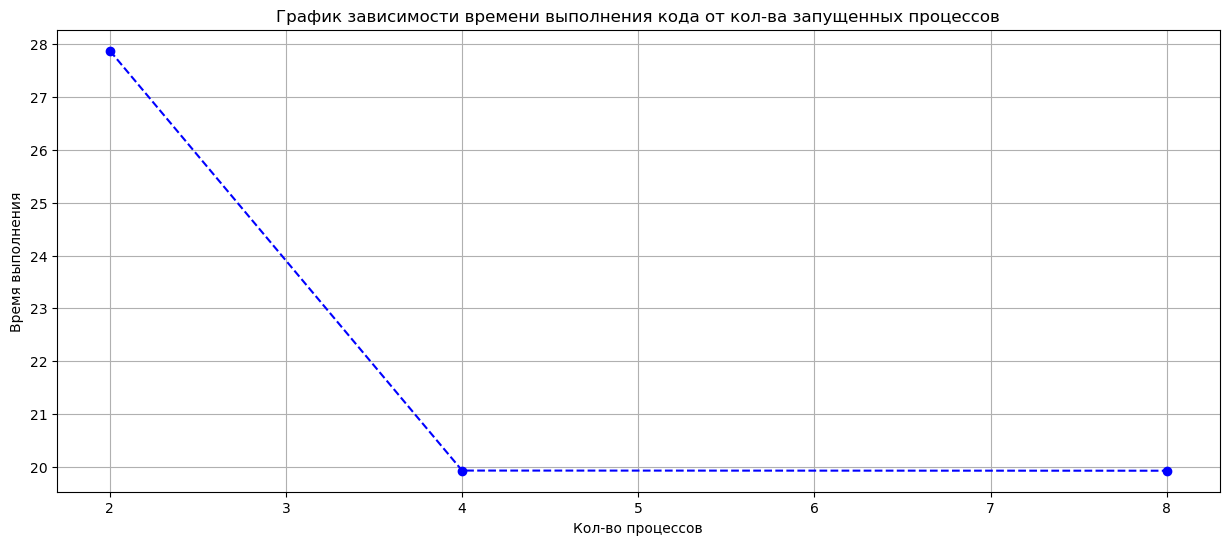

In [ ]:
import matplotlib.pyplot as plt 

plt.subplots(1, figsize=(15, 6))
plt.title('График зависимости времени выполнения кода от кол-ва запущенных процессов')
plt.xlabel("Кол-во процессов")
plt.ylabel("Время выполнения")
plt.grid()
plt.plot(parts_count_list, time_list, '--bo')

Кол-во процессов < кол-ва ядер - работает медленнее (чем ближе к кол-ву ядер тем быстрее), кол-во процессов >= кол-ва ядер - оптимальное константное время. (судя по трём наблюдениям)

8\. Напишите функцию `parallel_map`, которая принимает на вход серию `s` `pd.Series` и функцию одного аргумента `f` и поэлементно применяет эту функцию к серии, распараллелив вычисления при помощи пакета `multiprocessing`. Логика работы функции `parallel_map` должна включать следующие действия:
* разбиение исходной серии на $K$ частей, где $K$ - количество ядер вашего процессора;
* параллельное применение функции `f` к каждой части при помощи метода _серии_ `map` при помощи нескольких подпроцессов;
* объединение результатов работы подпроцессов в одну серию. 

In [ ]:
import numpy as np
import pandas as pd
import multiprocessing

In [ ]:
%%file do_pandas_map.py

def do_pandas_map(args):
    ser, func = args
    return ser.map(func)

Overwriting do_pandas_map.py


In [ ]:
from do_pandas_map import do_pandas_map

In [ ]:

def parallel_map(s: pd.Series, f: callable) -> pd.Series:
    K = 4
    with multiprocessing.Pool(processes=K) as pool:
        ser_map_list = pool.map(do_pandas_map, [(s.iloc[ind], f) for ind in np.array_split(s.index, K)])
        
    return pd.concat(ser_map_list)

In [ ]:
%%file add_five.py

def add_five(x):
    return x + 5

Overwriting add_five.py


In [ ]:
from add_five import add_five

In [ ]:
ser = pd.Series([i for i in range (0, 30, 2)])
parallel_map(ser, add_five)

0      5
1      7
2      9
3     11
4     13
5     15
6     17
7     19
8     21
9     23
10    25
11    27
12    29
13    31
14    33
dtype: int64

9\. Напишите функцию `f`, которая принимает на вход тэг и проверяет, удовлетворяет ли тэг следующему шаблону: `[любое число]-[любое слово]-or-less`. Возьмите любой фрагмент файла, полученный в задании 1, примените функцию `f` при помощи `parallel_map` к столбцу `tags` и посчитайте количество тэгов, подходящих под этот шаблон. Решите ту же задачу, воспользовавшись методом _серий_ `map`. Сравните время и результат выполнения двух решений.

In [ ]:
%%file is_pattern.py

import re 

def f(tag: str) -> bool:
    if re.fullmatch(r'^\d+-\w+-or-less', str(tag)):
        return True
    return False

Overwriting is_pattern.py


In [ ]:
from is_pattern import f

In [ ]:
tags_ser = pd.read_csv(f'tag_nsteps_3.csv').tags

In [ ]:
%%time
parallel_map(tags_ser, f).sum()

CPU times: total: 2.28 s
Wall time: 9.56 s


257244

In [ ]:
%%time
tags_ser.map(f, na_action='ignore').sum()

CPU times: total: 18.5 s
Wall time: 18.6 s


257244

10\. Используя пакет `pandarallel`, примените функцию `f` из задания 9 к столбцу `tags` таблицы, с которой вы работали этом задании. Посчитайте количество тэгов, подходящих под описанный шаблон. Измерьте время выполнения кода. Выведите на экран полученный результат.

In [ ]:
from is_pattern import f

from pandarallel import pandarallel 
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
%%time
tags_ser.parallel_map(f, na_action='ignore').sum()

CPU times: total: 2.66 s
Wall time: 10.3 s


257244